# Spanish Verbs in Embedding Space

## Overview
This section serves as the manager of the project, and will cover the following topics:
- **Aim and Goals**: clarify the focus of the project.
- **Plan**: clearly state each step of the project.
    - Although this seems a little self explanatory, exploratory data analysis (EDA) heavy projects like this one can easily rabbit-hole. The plan will be iterated on continuously and serve to determine whether a question that arises from EDA helps the final goal, before that question is explored and possibly branched further into new questions. 
- **Resources**: serves as a link lookup for each data needed, and allows us to verify whether we can access all the data necessary for our current plan before getting halfway and realizing data constraints mean we need to change the analysis.

### Aim and Goals
This project has a very simple idea: in English, verbs that start with "re", that also have a non-re counterpart (e.g., redo and do) mean "to do the verb again".
As I've been learning Spanish over the past few months, I've noticed verbs that do and do not follow this rule, so the project aims to use the embedding space of pre-trained language models to explore the adherence of Spanish verbs to this rule.

Although the aim is simple, this is my first project after a year of self studying my Master's in Data Science, so this project will be overly verbose, branching into side ideas to practice and iron out the application kinks in as many topics as I can.

An adaptive list:
- practice matrix math with embedding space
- practice creating language model
- practice using pretrained models


### Plan
1. We need a Parts-of-Speech model to label a Spanish corpus as verbs or not.
    1. Will need to test POS model's ability before using it to get a large list of verbs.
        1. Find premade list of verbs.
        2. Test POS performance on premade verb list.
2. Get Spanish Verbs
    1. Find Spanish Corpus
    2. Use POS to filter for Verbs.
    3. Create Bag-of-Words
3. Get embedding models.
    - Explain how transformers create embeddings from text using Hugging Face and BERT
    - Hugging Face Transformer
    - SpaCy tok2vec component
    - Fasttext: will be baseline
    - Maybe use glove or word2vec as other baselines
4. Create baseline distance:
    - Min and max distance between verbs
    - Standard deviation of distance between verbs
    - Average distance of kth closest verb for first 30 k's
        - For every verb, calculate distance of 30 closest verbs, then average over all verbs
    - Sanity check: Average distance between a few verbs and their similarity verb clusters
5. Create tuples of re verbs and their non re counterparts
6. Tests on RE verbs:
    - 2D feature reduction:
        - plot tuples in 2D space
    - Embedding distance between tuples
        - Min, max, mean, std dev
        - plot distribution
        - plot distance vs length of verb
        - plot distance vs use of verbs (which metric to combine uses? average or max or both?)
    - Kth closest verb for each item of each tuple
    

Other: should I add sense2vec or other sense vector models and compare the words, somehow, in each sense? At least mention sense vectors.


### Resources

<u>Spanish Corpora and Word Lists</u>

| Type       | Source        | Link |
|------------|---------------|------|
| Corpus     | Kaggle        | [120M Words](https://www.kaggle.com/datasets/rtatman/120-million-word-spanish-corpus) |
| Corpus     | HuggingFace   | [LargeSpanishCorpus](https://huggingface.co/datasets/large_spanish_corpus) |
| Corpus     | HuggingFace   | [SpanishBillionWords](https://huggingface.co/datasets/spanish_billion_words) |
| Words      | Github        | [lorenbrichter](https://raw.githubusercontent.com/lorenbrichter/Words/master/Words/es.txt) |
| Verbs      | Github        | [bretttolbert](https://github.com/bretttolbert/verbecc/blob/main/verbecc/data/verbs-es.xml) |
| Verbs      | Github        | [ghidinelli](https://github.com/ghidinelli/fred-jehle-spanish-verbs/blob/master/jehle_verb_database.csv) |

<br>

<u>Parts of Speech Checkers</u>
- Hard coded: ar, er, ir
- HuggingFace: [Spanish RoBERTa](https://huggingface.co/PlanTL-GOB-ES/roberta-large-bne-capitel-pos)
- Spacy: [Spanish pipelines](https://spacy.io/models/es#es_core_news_md)

### Things Learnt
1. Transformer's have contextual embeddings (think multi-head attention), so they cannot provide an embedding for stand-alone words.
2. Using a non-tabular data structure is much more difficult (did this to try and save memory as I started the project on GitHub CodeSpaces)
3. CodeSpaces is not ready for ML work or non-personal projects: max 8GM RAM; max hard drive space, no GPU/TPU availability.
4. The full pipeline for data downloading and cleaning should be done on a mini batch first to save time. Once the pipeline is complete and tested, it can be checked on more mini batches, and then on the entire dataset.

### Things I Would Do With More Time
1. Try/except + logging clauses for code that downloads the corpus data and derives the word embeddings.
    - On each instance in case some instances are not cleaned or have quirks
    - On each REST request, as these do not always execute perfectly (e.g., signal drops, rate limit hit, etc.)
    * This would add a step during analysis to ensure models have similar sample sizes of embeddings.
2. Better understand and create a hyperparameter tuning pipeline since the results are sensitive to hyperparameter choice.
3. Graphs across distance metrics and models should be normalized
4. Add quantitative stats for each qualitative graph to aid in analysis
5. Clustering on the embedding space to aid in exploration.

## Terminology and Background Info
As many topics in natural language processing (NLP) are new and evolving, terms are often used for multiple, distinct ideas, which can confuse those new to the topic. We will set clear definitions for these terms to avoid confusion throughout the project.

As well, we will briefly explain model concepts so that decisions and comparisons made throughout the project can be appreciated by non-experts.

### Clarifying Common Terms
Below is a clarification of some terminology that I've often seen used a little less specifically than is useful for people entering the space.

Processes:
- **Encoding:**
  - **Meaning:** Tokenization and then numericalization. Takes text data, tokenizes it into string or byte tokens, and outputs a numerical scalar, called a token ID, for each token in the input sequence.
  - **Conflated with:** Sometimes used to mean just tokenization.
- **Tokenization:**
  - **Meaning:** Splitting text data into smaller text data or into byte-data based on some rules.
  - **Conflated with:** Used with about a 50 / 50 to mean solely tokenization, or tokenization and numericalization.
- **Numericalization:**
  - **Meaning:** Mapping a token to a numerical scalar called a token ID.
  - **Conflated with:** This is almost never mentioned, but its crucial to understanding how the feature space of ML embedding models begin.
- **Embedding Lookup:**
  - **Meaning:** Mapping a token ID to position in multidimensional feature space, which we will call **input token embeddings**. These non-learnable embeddings are the tokens of the tokenizer, in the language of the embedding model. They are non-learnable, stored in an embedding matrix, and made based on a single vocabulary, to be sufficiently separated so that the embedding model can learn how to associate the tokens without a preconceived bias in the form of some tokens being closer together than others.
  - **Conflated with:** This is also almost never mentioned, but it is so crucial! To understanding how the feature space of ML embedding models begin.
    - **Note:** The term token embedding or word embedding is conflated constantly: when talking about the parts of a model, input word embeddings are simply called word embeddings. But when talking about uses of embedding models, word embeddings are the output of the embedding model for each token. So we will continue using input and output to distinguish the two. 
- **Embedding:**
  - **Meaning:** Mapping a numerical vector that lacks semantic or contextual meaning (an input token embedding) to a numerical vector with semantic or contextual meaning (an output token embedding).
  - **Conflated with:** Sometimes used to mean tokenization.

Algorithms:
- **Tokenizer:**
  - **Meaning:** When the tokenizer is stand-alone and is not used for a specific model, it means an algorithm that solely performs tokenization. When the tokenizer is meant to be used for a specific, pre-trained model, it usually means an algorithm that includes the tokenization and numericalization steps, as the word embedding model almost never takes tokens in the form of strings or bytes.
  - **Conflated with:** Sometimes used to mean an algorithm that performs the whole pipeline of tokenization, numericalization, embedding lookup, and embedding.
- **Embedding model**:
- **Language model**:

### Encoder vs Decoder

The distinction between encoder and decoder has different meanings even inside ML. In terms of **autoencoders**, an encoder learns a mapping from input feature space to a lower dimensional feature space, and a decoder learns to reconstruct the original feature space from the lower dimensional space.

This is the understanding of encoders and decoders that I see most often, and its proliferation is shown in AI chatbots. When I asked Bing copilot to explain the difference between encoder and decoders, and have it align with GPT being decoder only and BERT being encoder only, it was unable to deviate from this common explanation.

In the context of sequential data however:
- **Encoders** are bidirectional and non auto-regressive. I.e., models that have access to the entire sequence before yielding an output that will be used.
- **Decoders** are unidirectional and auto-regressive. I.e., models that have access to only previous elements of a sequence before yielding an output that will be used.
    - During training, auto-regressive models use **teacher forcing**, which means using the next element of the ground-truth labels as input instead of the model's last output, to avoid compounding errors. Giving future elements to the auto-regressive model would "cheat", i.e., would train the model in an environment that will not exist during application.
    - During prediction, future elements of the sequence do not exist, so a decoder cannot use the whole sequence.

Here are some examples to solidify the definitions:
- **Encoder-decoder RNN model**: this model type is often used for neural machine translation (NMT), i.e., using neural networks to translate between languages. The encoder RNN takes one element of the sequence per timestep, but its output (specifically, the hidden state of its highest layer) is not used until the encoder RNN sees the entire input sequence. The decoder RNN also takes one element of the sequence per time step, and its output is used as every timestep, while taking the output of the encoder RNN, that has used the entire encoder input sequence, at every timestep.
- **A Seq2Seq RNN decoder**: to derive a single value from a sequence, you may use an Seq2Seq RNN instead of a Seq2Vec to give more comparisons to the loss function. In this case, the model is producing an output for every (or at least some) of the elements of the input sequence, but only the final output value will be used, and the model will have seen the entire input sequence before yielding this value, so this is the design of an encoder.
- **GPT**: a unidirectional, auto-regressive transformer model that uses masked self-attention. In the [original paper](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf) it used next word prediction for pre-training.
- **BERT**: BERT and [its variants](https://www.tensorflow.org/text/tutorials/classify_text_with_bert#loading_models_from_tensorflow_hub) are bidirectional, non auto-regressive transformer models that create an embedding based on the entire input sequence before an output layer or component uses that embedding for some task.

Note that encoder-only models like BERT, and decoder-only models like GPT, can both perform classification and natural language generation tasks:
- GPT's auto-regressive architecture naturally lends itself to natural language prediction, but its final output vector, the *extract* token in the [original paper](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf) can be used as an embedding of the entire input sequence for classification tasks.
- BERT bidirectional architecture naturally lends itself to classification tasks, but the first element of its output vector, the *CLS* token in the [original paper](https://arxiv.org/pdf/1810.04805.pdf), can be fed to a decoder model for text generation tasks like text summation.

Maybe links to add:
- lack of congruity on the topic [here](https://datascience.stackexchange.com/questions/118260/chatgpts-architecture-decoder-only-or-encoder-decoder)
- T5 paper, section 3.2.1, discussing model structures [here](https://arxiv.org/pdf/1910.10683.pdf)

### Parts of an ML NLP Model


Trainable NLP models can be thought of as three distinct parts:
- **Tokenizer model**: a set of pre-defined rules that performs normalization (cleaning raw text), tokenization (dividing cleaned text data it into string or byte tokens) and numericalization (maps each token to numerical scalar called a **token ID**). 
- **Embedding model**: a embedding matrix that performs embedding lookup (each token ID is mapped to an input embedding token in embedding space) followed by a set of a set of neural layers that performs embedding (maps input token embeddings to output token embeddings in a learnable embedding space that represents features of speech, with respect to that embedding lookup mapping).
- **Task head**: one or more neural layers that map the output token embeddings to the output(s) needed for a specific task.

Each pre-trained model has a specific tokenizer that preprocessed the data before training. An embedding model can only be used with its own tokenizer because the embedding model understands language in the context of the input token embeddings, and the map from a language to those embeddings are stored in the tokenizer.

A single training instance is usually one or more sentences. Each token in that instance is an element of the sequence for that instance.

As well as token IDs, some tokenizers will pass position IDs and mask IDs to the embedding model. The embedding model will have a separate embedding lookup matrix for each type of ID. Each matrix will output the same number of dimensions, and the input token embeddings will be a sum of the embedding for each ID.

### NLP Models

The title to this section is vague as many models fall into multiple categories: tokenizers, embedding models,  language models.

<u>Ignores Semantics and Context</u>
- Models that cannot capture semantics nor context are used solely for tokenization.
- Examples: bag of words (BOW), term frequency inverse document frequency (TF-IDF).

<u>Captures Semantics, Ignores Context</u>
- Current models that capture semantics are neural networks comprised solely of simple feed forward layers. They are mainly used to tokenize and embed text before giving those embeddings to a more complex model for further embedding and task output, but can also be used themselves for non natural language generation tasks.
- Examples: Word2Vec, GloVe, FastText

<u>Captures Semantics and Context</u>
- Current models that capture both semantics and context are neural networks comprised of layers that can combine multiple elements of a multidimensional sequence, i.e., recurrent, convolutional, and attention layers (the distinction here being that feed forward layers handle elements of a sequence separately).
- They are mainly used to tokenize, embed, and then perform NLP tasks that can involve natural language generation tasks, but can also be used solely for their embeddings.
- Examples:
    - Encoders like BERT and its variants will usually use a task head of simple feed forward layers for classification tasks, and a complex decoder for natural language generation tasks, giving both task heads as input, the final embedding of a single token, usually a special token that does not correspond to any input text data  (e.g., CLS for BERT).
    - Decoders like GPT will usually also use a task head of simple feed forward layers for classification tasks, and its sequence of outputs for natural language generation tasks. For the classification tasks, a task head would also receive the final embedding of a single, special token (e.g., the extract token for GPT)

### Word Embeddings


**Word embeddings** are multidimensional vectors that should carry semantic structures of language, as well as contextual structures if the model is contextual. The reasoning is that, if a neural network is trained on one or more tasks that involve understanding speech, the hidden layers are likely capturing structures present in that language.

<br>

<u>Extracting Word Embeddings</u>

Since different architectures have different methods for mapping hidden layer outputs to the output layer and thus to the loss function, how we derive word embeddings is architecture dependent:
- **Word2Vec**: both model types - CBOW and skip-gram - use a single feed forward hidden layer that is unique in the sense that it is connected to every output of every sequence element of the input layer, instead of the canonical dense layer practice of handling sequence elements independently. The output layer is connected to all neurons of the hidden layer, so the hidden layer represents semantic structure of the entire input text. Thus, we will pass single words to this model and use its entire hidden layer as the word embedding for the input word.
- **FastText**: their models upgrade the tokenizer to a subword approach but use the same architecture as Word2Vec models, so we will derive their word embeddings in the same way.
- **SpaCy models**: connects a word embedding component called `tok2vec` to multiple task-specific components that each use the `tok2vec`'s output as well as the output of necessary task-specific components. Thus, the `tok2vec` component is trained on multiple tasks. SpaCy employs a CNN and transformer `tok2vec` implementation, both of which have all of their token elements used in the task specific layers. This is in comparison to BERT and GPT-like architectures that use a single token for supervised learning tasks. Thus, we will take only the final layer embeddings of these models as the token vectors.
- **Transformers**: these models often use the embeddings of a single, special token (e.g. CLS for BERT or "predict" for GPT) that does not represent any input data. This token has the possibility of being influenced by any token embedding at any transformer layer, with higher layers having a more likely influence. Thus, common practice for deriving word embeddings from transformers is to sum the embeddings of the last few layers for each token that makes up the target word in the input.

<br>

<u>Contextually Dependent or Independent Word Embeddings</u>

It could be interesting to compare the embedding space of context-independent and dependent word embedding models, so we will use both types in our analysis.

Inputs:
- To the context-independent models, we will input sole verbs and document the embedding space for each verb.
- To the context-independent models, we will input each sample instance found in the corpus, and a verb embedding will be the average of that word embedding in each sentence containing the word. As well, we will note the word counts incase very infrequent verbs change the results of our analysis.

### Word Embedding Model Libraries

#### FastText

The **FastText model** is the skip-gram model using a [subword vocabulary]((https://arxiv.org/pdf/1607.04606.pdf)) made of all n-grams found in the training corpus, where n is a single choice between 3-6. Each word is represented as the sum of it's n-gram's token embeddings.

The [original](https://arxiv.org/pdf/1310.4546.pdf) **skip-gram model** uses a single feed forward hidden layer that is fully connected to each feature of each element in the input sequence. Note this difference from how PyTorch and Tensorflow implement feed forward layers, which is to have it fully connected solely to the last dimension of the input shape, which results in applying the layer independently to each element of a sequence passed to the layer.

As an example of the subword tokenizer, the word `happy` for a FastText model of n=4 is represented as the sum of the token embeddings for the tokens `<hap`, `happ`, `appy`, `ppy>`.

FastText hosts models [pre-trained](https://fasttext.cc/docs/en/crawl-vectors.html) with the following specs:
- Used the Common Crawl and Wikipedia text databases.
- Used the CBOW pre-training task with a window of 5 context words and 10 negative samples.
- Hidden layer has 300 neurons so each word embedding is 300D.
- Tokenizer used a 5-gram subword vocabulary.

#### SpaCy

SpaCy offers two types of ready-made models:
- [Pipeline models](https://spacy.io/models#design-cnn): models labelled `sm`/`md`/`lg` are a pipeline of [single-task](https://spacy.io/usage/processing-pipelines) CNN components that inherit from the (1) the tokenizer and (2) the last component output ([visual](https://spacy.io/models#design-cnn)). The exception being the Named Entity Recognition component which has its own trainable tokenizer. Thus, we will use the tokenizer trained on multiple tasks.
- [Transformer models](https://spacy.io/models#design-trf): models labelled `trf` are pipeline models that have only two differences from their non-transformer counterparts: (1) the tokenizer is transformer, and (2) the NER component does not have its own tokenizer. Thus, the only choice for non-task specific embedding layers is the transformer tokenizer component.

#### Transformer Models from HuggingFace 

Hugging Face is a machine learning platform that hosts an open-source database of pre-trained transformer models. Each model on the hub has a model card, that explain can explain the model's architecture, pre-training tasks, and usage via Hugging Face's `transformers` python library.

<br>

<u>Loading and Usage</u>

Many users create model cards that point to the pre-trained model file but do not create functionality for the transformers library. If the model is configured with the library, it can be used out-of-the-box via the [pipeline](https://huggingface.co/docs/transformers/pipeline_tutorial) functionality, or handled with more flexibility via an `AutoModel` [class](https://huggingface.co/docs/transformers/model_doc/auto#transformers.AutoModel).

<br>

<u>Fine-Tuning</u>

Models configured with `transformers` can be fine-tuned using the in-house `Trainer` [class](https://huggingface.co/docs/transformers/v4.37.1/en/main_classes/trainer#transformers.Trainer), or easily converted to work within the [PyTorch](https://pytorch.org/hub/huggingface_pytorch-transformers/) and [TensorFlow](https://www.tensorflow.org/text/tutorials/classify_text_with_bert) python library ecosystems.

<br>

<u>Preprocessing</u>

Each model is associated with the specific tokenizer that was used for pre-training. 

The tokenizer outputs scalar IDs, and the transformer model's first layer is an embedding layer that performs embedding lookup to map each ID to an embedding vector. Hugging Face tokenizers output token IDs and attention IDs, as well as token type IDs for some models. The subsequent transformer model will also require position IDs, which it assigns itself, and possible language IDs, which users currently have to prepare manually.

Each ID type is described below.

| ID Type       | Description |
| ------------- | ----------- |
| Token IDs     | These map each token string or byte to a scalar integer. |
| Token Type IDs| Used in models like BERT to differentiate between sentences in a pair. |
| Attention IDs | Used to mask out padding tokens, to create attention windows, or for masked attention in auto-regressive models.|
| Position IDs  | Only used for bidirectional / non auto-regressive models.|
| Language IDs  | Only used for multilingual or cross-lingual models (e.g., [XLM](https://arxiv.org/pdf/1901.07291.pdf)) and currently, must be manually created.|

<br>

<u>Layers and Outputs - A Deep-ish Dive</u>

**BERT** or "Bidirectional Encoder Representations from Transformers" is a popular bidirectional / non-masked transformer model, whose [architecture](https://arxiv.org/pdf/1810.04805.pdf) has remained the same in many newer models that improve the original training methods and training tasks used ([RoBERTa](https://arxiv.org/pdf/1907.11692.pdf), [XLM]()) or whose parameter sharing allows for a smaller model ([ALBERT](https://arxiv.org/pdf/1909.11942.pdf)).

We will use BERT to understand how to access components, layers, attention matrices, and outputs of a model in the Hugging Face `transformer` library.


In [22]:
from transformers import BertTokenizer, BertModel
model_name = "bert-base-multilingual-cased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(
    model_name, output_hidden_states = True,
    output_attentions = True, return_dict = True)

example_text = "El gato está en la caja. El perro lo busca a el." # The cat is in the box. The dog looks for him.
example_text = "El gato está en la caja. El perro lo busca a el. Hace dos dias habia mucha gente que bailan por toda la noche y al final, todo se fue feliz. Tambien, el dijo a todo que tuvo un gran tiempo." # The cat is in the box. The dog looks for him.
token_ids = tokenizer(example_text, return_tensors="pt") # returns PyTorch tensors
outputs = model(**token_ids)


KeyboardInterrupt: 

The tokenizer used for BERT implements **WordPiece** tokenization, a sub-word tokenization method that starts with a vocabulary of all characters in the training data, and for k steps, merges two tokens in the vocabulary, including merged tokens, to create the next most seen sub-word. BERT's tokenizer then adds a CLS token to the start of each sequence, and a SEP token between each sentence in a single sample instance (relevant for tasks like next sentence prediction and sentence comparison). Then the tokenizer performs padding and truncation if necessary, and then maps each str token to a integer scalar, called a token ID. Finally, it outputs three features for each token: token IDs, position IDs, and attention IDs.

Even though we have two sentences, our model does not have a task head that can handle next sentence prediction, so the corresponding tokenizer does not differentiate between the sentences, and gives tokens in both sentences the same attention ID.

In [ ]:
inputs = tokenizer(example_text)
print(f"Number of tokens: {len(inputs['input_ids'])}")
for key, value in inputs.items():
    print(f"{key}: {value}")

Now we'll go through each component of BERT to understand how the sub-word representing token IDs are transformed to a embedding that contains semantic and contextual info, and further transformer to the output of a task.

Hugging Face's BERT implementation is divided into 3 components:
- "Embedding": performs embedding lookup on each ID feature and combines the ID features
- "Encoder": performs the semantic and contextual embedding
- "Pooler": takes the embedding at the CLS token position and applies a single feed forward layer.

<br>

A note on the Pooler and Task Heads:

When using a transformer for a specific task, a "*task head*" will be attached, which is simply an output layer that matches the outputs needed for the task, and possibly a few trainable layers between the ransformers pre-trained embedding layers and the output layer.

The user can choose to feed the pooler's output to the task head, but most implementations I've seen on Hugging Face simply delete it and add their own task head that directly takes the CLS token embedding.

In [ ]:
model

BERT's embedding layer stores three embedding matrices that were trained along with the rest of the model during pre-training. It first performs embedding lookup to transform the three ID features from sequences of scalars to sequences of multidimensional vectors.

The sum of the three lookup embedding vectors is then layer normalized for each element of the input sequence to create a single input token embedding for each element the input sequence (see [source code](https://github.com/huggingface/transformers/blob/0b5c7e4838fddeb4601acbb80cd2c71ddcf76726/src/transformers/models/bert/modeling_bert.py#L234) if interested).

**Layer Normalization** means normalization applied to each unit of a layer, transforming the activations (output values of a layer) onto the unit hypersphere. For attention layers, this means that a mean and variance are calculated for each element in the sequence, across all features of that element. In the context of input token embeddings, each token embedding will be normalized across its embedding dimensions.

Note that PyTorch's `LayerNormalization` implementation applies, by default, a learnable affine transformation after normalization, meaning you must set the seed of the random generator to the same value if you want to train the normalization layer multiple times and return the same value for the same dataset.

**Dropout** is a regularization technique that involves setting the activations of a given percentage of elements in a layer to zero, resulting in a thinned neural network. The [original paper](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf) suggests selecting the thinned network anew for every training instance, but [PyTorch](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html) and [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) implementations both perform it once per batch / step. In the context of input token embeddings, each element of the embedding vector of each sequence has an independent chance of being dropped.



In [ ]:
model.embeddings

BERT's "encoder" component contains all of its 12 transformer layers. Note that a 24 layer version also exists.

Each layer performs bidirectional self-attention with 12 heads, and then 3 feed forward layers sandwiched with normalization layers, skip connections, and a GELU activation function. The bottom of [this post](https://gmihaila.medium.com/%EF%B8%8F-bert-inner-workings-1c3054cd1591) has a great diagram of the model.

In [ ]:
model.encoder

Finally, lets go over what outputs we can get from a Hugging Face model:
- `attentions`: contain the attention matrices for each head of each self-attention layer of the model. One attention matrix has shape `[sequence_length, sequence_length]` and shows, for each query, the distance between that query and every model, in embedding space. This model has 12 self-attention layers, each with 12 heads, so `12*12` attention matrices.
- `hidden_states`: the activations (i.e., final output embeddings) of the embedding layer and the 12 `BertLayer`, so 13 matrices with shape `[sequence_length, model dimensions]`
- `last_hidden_state`: the activations of the last attention layer. Note [post processing](https://huggingface.co/docs/transformers/en/main_classes/output#model-outputs) functions may cause this value to be unequal to `hidden_states[-1]`.
- `pooler_output`: the activations of the feed forward layer that transformer's the CLS token's final embedding.

In [ ]:
print(
    f"Attention matrices: {len(outputs.attentions)} layers of {outputs.attentions[0].shape[1]} "
    + f"heads. Each matrix has shape {list(outputs.attentions[0].shape[2:])} meaning "
    + "[sequence length of queries, sequence length of keys]")
print(
    f"Hidden states: {len(outputs.hidden_states)} sets (for the embedding layer + 12 attention "
    + f"layers) of shape {list(outputs.hidden_states[0].shape[1:])} meaning "
    + "[sequence length, model dimensions]")
print(
    f"Last hidden state: has shape {list(outputs.last_hidden_state[0].shape)} meaning "
    + "[sequence length, model dimensions]")
print(
    f"Pooler output: a 1D vector of {outputs.pooler_output[0].shape[0]} dimensions")

Now that we understand inputs, layers, and outputs of a transformers model, it would be interesting to visualise where in embedding space the input vectors start and where they end up after the transformers applies the contextual and semantic mapping that it learnt during pre-training. 

We'll use PCA and t-SNE to reduce the dimensionality to two for plotting. t-SNE can create reductions with different non-linear relationships, so we'll make a few plots, sampling different numbers of components, as well as PCA-only plot.

In [ ]:
def plot_embeddings(tsne_components: List[int]):

    # Feature IDs (scalar)
    word_ids = token_ids.input_ids[0]
    sentence_ids = token_ids.token_type_ids[0]
    position_ids = list(range(len(word_ids)))

    # Embedding Lookup Matrices
    word_embedding_matrix = model.embeddings.word_embeddings.weight.detach().numpy()
    sentence_embedding_matrix = model.embeddings.token_type_embeddings.weight.detach().numpy()
    position_embedding_matrix = model.embeddings.position_embeddings.weight.detach().numpy()

    # Input Embeddings
    word_embeddings = word_embedding_matrix[word_ids]
    sentence_embeddings = sentence_embedding_matrix[sentence_ids]
    position_embeddings = position_embedding_matrix[position_ids]
    input_token_embeddings = outputs.hidden_states[0][0].detach().numpy()

    # Meaningful Output Embeddings
    output_token_embeddings = outputs.last_hidden_state[0].detach().numpy()

    # Combine all lists
    data = np.concatenate((
        word_embeddings, sentence_embeddings, position_embeddings,\
        input_token_embeddings, output_token_embeddings), axis=0)

    # Define the lengths of the embeddings
    lengths = [
        len(word_embeddings), len(sentence_embeddings), len(position_embeddings), \
        len(input_token_embeddings), len(output_token_embeddings)]

    # Define the plot size
    size = 10
    alpha = 0.3

    # Create subplots, one for PCA and other for each number of components in t-SNE
    tsne_components.insert(0, None) # plus one for PCA
    num_rows = len(tsne_components) // 2 + len(tsne_components) % 2
    fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

    # Create t-SNE plots
    for i, n_components in enumerate(tsne_components):

        # Reduce dimensionality to 2D for plotting
        if i == 0:
            # Use PCA to reduce dimensionality to 2D
            pca = PCA(n_components=2)
            plot_data = pca.fit_transform(data)

            title = f'PCA to 2D'
        else:
            # Use PCA to reduce dimensionality to size that t-SNE can handle
            pca = PCA(n_components=n_components)
            data_pca = pca.fit_transform(data)

            # Use t-SNE to reduce dimensionality to 2D for plotting
            tsne = TSNE(n_components=2)
            plot_data = tsne.fit_transform(data_pca)

            title = f'PCA to {n_components}, t-SNE to 2D'

        # Split the transformed data back into separate arrays
        plot_word, plot_sentence, plot_position, plot_input_token, plot_output_token \
            = np.split(plot_data, np.cumsum(lengths)[:-1])

        # Sentence embedding is the same for all elements of the sequence
        plot_sentence = np.mean(plot_sentence, axis=0).reshape(1, -1)

        ax = axs[i//2, i%2]
        ax.scatter(plot_word[:, 0], plot_word[:, 1], c='r', label='Word Embeddings', s=size, alpha=alpha)
        ax.scatter(plot_sentence[:, 0], plot_sentence[:, 1], c='g', label='Sentence Embeddings', s=size*6, alpha=alpha)
        ax.scatter(plot_position[:, 0], plot_position[:, 1], c='b', label='Position Embeddings', s=size, alpha=alpha)
        ax.scatter(plot_input_token[:, 0], plot_input_token[:, 1], c='y', label='Input Token Embeddings', s=size, alpha=alpha)
        ax.scatter(plot_output_token[:, 0], plot_output_token[:, 1], c='m', label='Output Token Embeddings', s=size, alpha=alpha)

        ax.set_title(title)

    ax.legend(bbox_to_anchor=(0.5, -0.15), loc='upper center')
    plt.show()

In [ ]:
plot_embeddings([25, 50, 100])

Note that the weights of lookup matrices of the three input embedding features were trained along with the transformer layers, so the positions we see were optimized along with the output embedding space.

As expected, the input embedding tokens are represented in a similar area of embedding space as the three components that it's made of. Of those components, token embeddings seem to start off with the most variance in embedding space, with position embeddings in a tighter cluster. Interestingly, positional and token type embeddings do not take on their own spaces, but share the input embedding region that word embeddings use.

The output embedding space however, seems to use a completely separate area of embedding space to represent the semantic and contextual information of the tokens.

## Housekeeping Code - Imports and Utility Functions

In [1]:
## Imports

from typing import Union, List, Dict, Tuple
import xml.etree.ElementTree as ET
import requests
import random
import csv
import json
import os
import requests
from io import StringIO
import spacy
import datasets
import numpy as np
import pandas as pd
import tensorflow as tf
from datasets import load_dataset
from collections import defaultdict
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import fasttext.util
from transformers import AutoTokenizer, AutoModel
import torch
import psutil
import pickle
import logging
import subprocess
import seaborn as sns
from annoy import AnnoyIndex
import pprint


2024-03-05 16:17:15.591664: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-05 16:17:15.591726: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-05 16:17:15.593614: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-05 16:17:15.603658: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-05 16:17:16.904456: W tensorflow/compiler/tf2

In [2]:
## Utility Functions

import sys
from types import ModuleType, FunctionType
from gc import get_referents

# Custom objects know their class.
# Function objects seem to know way too much, including modules.
# Exclude modules as well.
BLACKLIST = type, ModuleType, FunctionType

def getsize(obj):
    """sum size of object & members."""
    if isinstance(obj, BLACKLIST):
        raise TypeError('getsize() does not take argument of type: '+ str(type(obj)))
    seen_ids = set()
    size = 0
    objects = [obj]
    while objects:
        need_referents = []
        for obj in objects:
            if not isinstance(obj, BLACKLIST) and id(obj) not in seen_ids:
                seen_ids.add(id(obj))
                size += sys.getsizeof(obj)
                need_referents.append(obj)
        objects = get_referents(*need_referents)
    return size

def crash():
    # Get the CPU usage
    cpu_usage = psutil.cpu_percent()
    print(f'CPU usage: {cpu_usage}%')
    # Get the memory usage
    memory_usage = psutil.virtual_memory().percent
    print(f'Memory usage: {memory_usage}%')

## Data Understanding and Preprocessing

I initially thought that a complete list of Spanish verbs would be readily accessable from multiple dictionary websites or sources. After some searching, this does not seem to be the case, but that means we get to practice more NLP!

We will instead create a list of Spanish verbs by parsing verbs from a large Spanish corpus. We'll choose a corpus that focuses on modern Spanish to analyse verbs currently in use.

### Datasets from Hugging Face

As well as models, Hugging Face hosts a vast [database](https://huggingface.co/datasets) of labelled and unlabelled datasets that can be added to by anyone. The database can be filtered by task, language, or size.

Each dataset is indexed by its *dataset ID*, and is further divided into *configurations*, which are usually split along some feature (e.g., English, Spanish, etc.), and further divided into splits (tran, test, etc.). Each dataset comes with a dataset card, which shows the type, distribution, and some examples of each feature in the dataset.

<u>Accessing and Dataset</u>

A dataset can be accessed via Hugging Face's python library called `datasets`, or their REST API called [Dataset Server](https://huggingface.co/docs/datasets-server/index).

The REST API allows one to search and index the dataset as well as get summary statistics without downloading the data. 

<u>Streaming a Dataset</u>

Large datasets that cannot fit into memory can be streamed via both methods, although the the python library iterator returns a single instance at a time, whereas the API allows a max of 100 instances per call.

In my speed tests I found the API to be faster for downloading many instances. Note that you can specify sharding configurations that might allow the python library method to surpass the REST API's 100 instance cap.

<u>Working with Datasets</u>

Hugging Face has their own dataset object machinery, as well as simple methods to convert to [PyTorch](https://huggingface.co/docs/datasets/v2.16.1/use_with_pytorch#data-loading) or [TensorFlow](https://huggingface.co/docs/datasets/v2.16.1/use_with_tensorflow#data-loading) dataset objects.

We will use Wikepedia's [Spanish corpus](https://huggingface.co/datasets/wikimedia/wikipedia/viewer/20231101.es), comprising all Spanish entries on Wikepedia's website.

Lets get acquainted with the dataset.

In [3]:
def hf_dataset_summary(dataset: str, config: str, split: str) -> None:
    """
    Prints a summary of the dataset's metadata.
    """
    # Get Hugging Face API token
    with open('apis.json', 'r') as f:
        API_TOKEN = json.load(f).get('hugging_face')

    base_url = "https://datasets-server.huggingface.co/statistics"
    headers = {"Authorization": f"Bearer {API_TOKEN}"}
    params = {
        "dataset": dataset,
        "config": config,
        "split": split
    }
    response = requests.get(base_url, params=params, headers=headers)
    if response.status_code != 200:
        print(f"Failed to retrieve dataset summary with status code '{response.status_code}': {response.text}")
    return response.json()


In [4]:
dataset = 'wikimedia/wikipedia'
config = '20231101.es'
split = 'train'
hf_dataset_summary(dataset, config, split)

Failed to retrieve dataset summary with status code '500': {"error":"We have no connection or you passed local_files_only, so force_download is not an accepted option."}


{'error': 'We have no connection or you passed local_files_only, so force_download is not an accepted option.'}

Unfortunately the wikipedia dataset does not seem to [support](https://huggingface.co/docs/datasets-server/statistics#explore-statistics-over-split-data) this summary API operation. Below is an example of normal usage.

In [5]:
dataset = 'glue'
config = 'cola'
split = 'train'
summary = hf_dataset_summary(dataset, config, split)
print(f"Rows: {summary['num_examples']}")
for col in summary['statistics']:
    print(f"Column '{col['column_name']}' has attributes {list(col['column_statistics'].keys())}")

Rows: 8551
Column 'idx' has attributes ['nan_count', 'nan_proportion', 'min', 'max', 'mean', 'median', 'std', 'histogram']
Column 'label' has attributes ['nan_count', 'nan_proportion', 'no_label_count', 'no_label_proportion', 'n_unique', 'frequencies']
Column 'sentence' has attributes ['nan_count', 'nan_proportion', 'min', 'max', 'mean', 'median', 'std', 'histogram']


Here's another endpoint we can use to get info on the dataset's data types and data size.

In [6]:
def hf_dataset_info(dataset: str, config: str, split: str) -> None:
    """
    Prints info of the dataset's metadata.
    """
    # Get Hugging Face API token
    with open('apis.json', 'r') as f:
        API_TOKEN = json.load(f).get('hugging_face')

    base_url = "https://datasets-server.huggingface.co/info"
    headers = {"Authorization": f"Bearer {API_TOKEN}"}
    params = {
        "dataset": dataset,
        "config": config,
        "split": split
    }
    response = requests.get(base_url, params=params, headers=headers)
    if response.status_code != 200:
        print(f"Failed to retrieve dataset summary with status code '{response.status_code}': {response.text}")
    return response.json()

dataset = 'wikimedia/wikipedia'
config = '20231101.es'
split = 'train'
dataset_info = hf_dataset_info(dataset, config, split)

print(f"Dataset size when loaded into memory: {round(dataset_info['dataset_info']['dataset_size']/10**9)}Gb", '')
pprint.pprint(dataset_info)

Dataset size when loaded into memory: 32Gb 
{'dataset_info': {'builder_name': 'parquet',
                  'citation': '',
                  'config_name': '20231101.es',
                  'dataset_name': 'wikipedia',
                  'dataset_size': 32483180986,
                  'description': '',
                  'download_size': 3493595869,
                  'features': {'id': {'_type': 'Value', 'dtype': 'string'},
                               'text': {'_type': 'Value', 'dtype': 'string'},
                               'title': {'_type': 'Value', 'dtype': 'string'},
                               'url': {'_type': 'Value', 'dtype': 'string'}},
                  'homepage': '',
                  'license': '',
                  'splits': {'train': {'dataset_name': None,
                                       'name': 'train',
                                       'num_bytes': 32483180986,
                                       'num_examples': 1841155}},
                  'versio

The dataset is quite large (32Gb), so we won't be able to store it locally or load it all into memory; any processing will have to be done iteratively.

Of the four features, `text` is the only useful one for us. Lets see how large each text is.

In [7]:
def iter_hf_corpus(batch_size: int = 100, offset: int = 0) -> List[str]:
    """
    Returns an iterable that retrieves a list of sentences
    from the wikipedia's spanish dataset on HuggingFace.
        Once the end of the dataset is reached, it will return an empty list []
        for every subsequent call.
    """
    dataset = 'wikimedia/wikipedia'
    config_name = '20231101.es'
    split = 'train'

    base_url = "https://datasets-server.huggingface.co/rows"

    batch_size = min(batch_size, 100) # Max batch_size is 100

    while True:
        params = {
            "dataset": dataset,
            "config": config_name,
            "split": split,
            "offset": offset,
            "length": batch_size
        }
        response = requests.get(base_url, params=params)
        data = response.json()

        results = [instance["row"]["text"] for instance in data["rows"]]
        yield results

        offset += batch_size

count     1000.000000
mean      2715.145000
std       4123.056748
min         16.000000
25%        353.750000
50%       1134.500000
75%       3253.500000
max      36007.000000
dtype: float64


<Axes: >

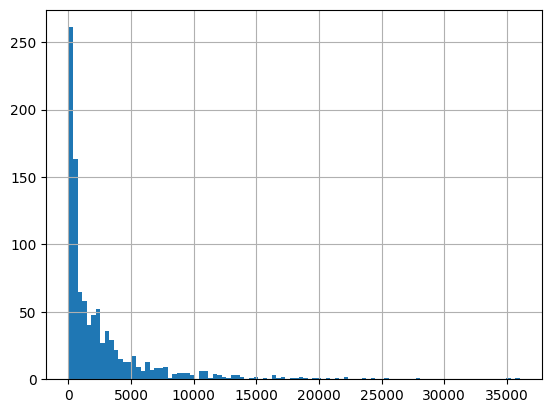

In [16]:
corpus_iterator = iter_hf_corpus(batch_size=100)
text_lengths = []

# Get the distribution of words per text for the first 10 batches of 100 texts
for _ in range(10):
    text_lengths.extend([len(text.split()) for text in next(corpus_iterator)])
text_lengths_series = pd.Series(text_lengths)

print(text_lengths_series.describe())
text_lengths_series.hist(bins=100)

Each text is quite long, likely a full article instead of a single sentence. Later on we'll want to pass the texts through transformer models, which have max input sequence sizes, so we'll have to divide the text into smaller pieces.

As well, since we are interested in verbs we will need a method for differentiating verbs from other words. To do this, we can use a **Parts of Speech** (**POS**) tagging model, which labels each word with its POS: noun, verb, adjective, etc. POS models can be rule based or stochastic / machine learning based. A few good POS models for the Spanish language are listed in Resources. We will use stochastic-based model as they are better able to handle ambiguity.

### Parts-of-Speech Tagging by SpaCy

SpaCy is a NLP library designed for production use. It provides out-of-the-box models, as well as a library for training models and preparing them for productions.

Lets write a function to load a SpaCy model and another to perform POS on a text input and format the output.

In [ ]:
def get_spacy_pos_lem(model_type: str = "medium") -> spacy.language.Language:
    """
    Loads a SpaCy model for Spanish that performs:
    - Tokenization
    - Parts of speech tagging
    - Dependency parcing
    - Lemmatization
    and disables the named entity recognition (NER) part of the model.
    """
    models = {
        "small": "es_core_news_sm",
        "medium": "es_core_news_md",
        "large": "es_core_news_lg",
        "transformer": "es_dep_news_trf"}

    ## Check if model argument is valid
    try:
        model_name = models[model_type]
    except KeyError:
        raise ValueError("Invalid model name. Choose from 'small', 'medium', 'large', or 'transformer'.")

    ## Get model and download model if not installed
    while True:
        try:
            model = spacy.load(model_name, disable=["ner"])
            break
        except OSError:
            print(f"Installing Spacy model '{model_name}'")
            spacy.cli.download(model_name)
    return model


def spacy_pos_tagger(
    data: Union[List[str], str], model: spacy.language.Language = None, model_type: str = None
    ) -> np.array:
    """
    Tags a text with the Part of Speech (POS) and infinitive verb of each word.

    Returns:
    - A numpy array with the following columns:
        - text: The word itself
        - pos: The part of speech of the word. E.g. VERB, NOUN, ADJ, etc.
        - lemma: The infinitive verb of the word. E.g., comer, nadar, etc.
    """
    ## Get SpaCy model
    if model is None:
        model = get_spacy_pos_lem(model_type)

    ## Clean input text
    if not isinstance(data, list):
        docs = [model(data)]
    else:
        docs = model.pipe(data) # uses SpaCy's internal batching

    pos = [[token.text, token.pos_, token.lemma_] for doc in docs for token in doc]
    return pd.DataFrame(pos, columns=["word", "pos", "lemma"])

SpaCy's [docs](https://spacy.io/models/es) state a POS accuracy of 0.95 to 0.99, depending on the model. Before we use the model to create a dataset of verbs, lets confirm the model's performance using a small pre-made list of verbs as labels. I found two lists from github users; we'll use Bret's list for now. 

Lets inspect our dataset of labels.

In [ ]:
def get_verbs_bret() -> List:
    # Send a GET request to fetch the XML content
    url = "https://raw.githubusercontent.com/bretttolbert/verbecc/main/verbecc/data/verbs-es.xml"
    response = requests.get(url)

    # Parse the XML content
    xml_content = response.content
    root = ET.fromstring(xml_content)

    # Parse verbs from xml content
    verb_elements = root.findall(".//v")
    verbs = [v.find("i").text for v in verb_elements]
    return verbs


def get_verbs_ghid() -> List:
    """
    Retrieves a list of verbs and definitions from ghidinelli's fred-jehle-spanish-verbs project.

    Returns:
    - A list of verbs.
    """
    verbs = []

    # Fetch CSV contents
    url = 'https://raw.githubusercontent.com/ghidinelli/fred-jehle-spanish-verbs/master/jehle_verb_database.csv'
    response = requests.get(url)
    file = StringIO(response.text)
    reader = csv.reader(file)

    # Parse verbs from csv contents
    next(reader)  # Skip the header row
    for row in reader:
        verb = row[0]
        definition = row[1] # In case I want these
        verbs.append(verb)

    verbs = list(set(verbs)) # Remove duplicates
    return verbs


def premade_verb_list(source: str = 'bret') -> List:
    """
    Retrieves a list of verbs from one of the premade sources.

    Returns:
    - A list of verbs.
    """
    if source == 'bret':
        return get_verbs_bret()
    elif source == 'ghid':
        return get_verbs_ghid()
    else:
        raise ValueError("source must be one of ['bret', 'ghid']")

In [ ]:
verbs = premade_verb_list()
random.sample(verbs, 10)

['repellar',
 'ocupar',
 'reconquistar',
 'guataquear',
 'zaherir',
 'recibir',
 'elijar',
 'tipear',
 'tarjar',
 'trasvolar']

Lets see how well SpaCy's models perform POS on the premade list. Note two weaknesses of our test dataset:
- Only samples the infinitive conjugation tense of verbs.
- Instances are single words instead of sentences. POS models often perform better with context.

In [ ]:
pos_df = spacy_pos_tagger(verbs, model_type='medium')
counts = pos_df[['pos', 'word']].groupby('pos').count()
counts = (counts * 100 /counts.sum()).round(2).sort_values('word', ascending=False)
counts

,word
pos,
VERB,94.98
NOUN,1.98
PROPN,1.42
ADJ,1.35
AUX,0.14
ADV,0.06
NUM,0.03
ADP,0.01
INTJ,0.01


The 0.95 accuracy is close to the stated 0.98 for the medium size model. The difference may be due to:
- rare verbs
- a lack of context since the verbs are stand alone words
- possibly some errors in bret's verb list; after some manual checking I found that some of the words do not exist on SpanishDict.com

In [ ]:
mislabelled = {
    pos: pos_df.loc[pos_df['pos'] == pos, 'lemma'].values.tolist() \
    for pos in pos_df['pos'].unique() if pos !='VERB'}
sample = {
    tag: (words if len(words) < 10 else random.sample(words, 5)) \
    for tag, words in mislabelled.items()}
sample

{'NOUN': ['entreoír', 'visar', 'rapiñar', 'fallir', 'enruinecer'],
 'PROPN': ['disturbar', 'reensayar', 'resorber', 'desencinchar', 'cinchar'],
 'ADJ': ['desceñir', 'lancinar', 'recolar', 'hipertrofiar', 'aureolar'],
 'AUX': ['enrabar', 'mancornar', 'amorriñar', 'enalbar', 'quintaesenciar'],
 'ADV': ['astriñir', 'costriñir', 'gandujar', 'guañir', 'lamber', 'muñir'],
 'NUM': ['desjarretar', 'esposar', 'reembolsar'],
 'PUNCT': ['engurruñar'],
 'PRON': ['gañir'],
 'INTJ': ['lamer'],
 'ADP': ['tractorar']}

We can see that AUX is also being used for some verbs, as it contains the common verbs estar, haber, saber, and ser.
Most of the verbs, however, seem very uncommon or simply not spanish words, so we'll move ahead with this POS model.

### POS Edge Cases

Some Spanish words are both verbs and have other meanings, so lets test how our model performs on these worst-case situation within sentences for context.

In [ ]:
def trick_verbs_test(model):
    """
    Como / comiendno        means to eat and is also a conjunction
    Nada / nadas / nadaba   means to swim and also means "nothing"
    Pasa / pasas            means to happen and also means raisins

    """
    # We surround the verbs in context so the model can differentiate between the verb and other meaning
    test_phrase = '\
        Yo como manzanas. Siempre estoy comiendo manzanas. Ella nada los sabados \
        y tu nadas los domingos. Antes, ella nadaba los domingos tambien. No le \
        pasa nada a ella cuando come pasas'

    test_words = ['como', 'nada', 'nadas', 'nadaba', 'pasa', 'pasas']

    array = spacy_pos_tagger(test_phrase, model)
    df = pd.DataFrame(array, columns=['text', 'pos', 'lemma'])

    df['Success'] = df['pos'] == 'VERB'
    df = df[df['text'].isin(test_words)]
    return df

In [ ]:
trick_verbs_test(spacy.load('es_core_news_lg'))

,text,pos,lemma,Success


We were hoping to see the model correctly label each test word as a verb, but more than half the tests failed.

Transformers use Multi-Head attention layers to understand sequences in the context of the rest of the sequence, so lets try SpaCy's tranformer model.

In [ ]:
trick_verbs_test(spacy.load('es_dep_news_trf'))

,text,pos,lemma,Success


The transformer was successful on two more of the tricks, but still makes error clear to a Spanish speaker.
 
Thankfully there are not many verbs with other meanings, so we'll stick with the medium sized model for now to save on compute cost.

### Speed Test 
Next we'll parse the Wikipedia Spanish corpus with our POS model to create list of modern-use Spanish verbs.

It could be interesting to see how our embedding space analysis varies with more and less common verbs. For this we'll want to make a bag-of-words, which is simply a frequency count of each word in a corpus or document.

The Wikipedia dataset is to large to fit in memory, so we'll stream the dataset in chunks, and apply the POS parsing and BOW counting in the same function to avoid iterating through the large dataset twice.

As well, this corpus is quite large, so we'll speed test some methods for applying POS to the streaming iterable before trying to parse the whole corpus.

In [ ]:
def hf_corpus_func() -> datasets.IterableDataset:
    """
    Create's an iterable for the HuggingFace large_spanish_corpus dataset.
        Streaming=True allows us to iterate over the dataset without loading it all into memory.
    """
    dataset = 'large_spanish_corpus'
    config_name = 'EUBookShop'
    split = 'train'

    dataset = load_dataset(
        dataset, name=config_name, split=split,
        streaming=True, trust_remote_code=True)
    return iter(dataset)

def hf_corpus_api(batch_size: int = 100, offset: int = 0) -> List[str]:
    """
    Returns an iterable that retrieves a list of sentences
    from the HuggingFace large_spanish_corpus dataset.
        Once the end of the dataset is reached, it will return an empty list []
        for every subsequent call.
    """
    dataset = 'large_spanish_corpus'
    config_name = 'EUBookShop'
    split = 'train'

    base_url = "https://datasets-server.huggingface.co/rows"

    batch_size = min(batch_size, 100) # Max batch_size is 100

    while True:
        params = {
            "dataset": dataset,
            "config": config_name,
            "split": split,
            "offset": offset,
            "length": batch_size
        }
        response = requests.get(base_url, params=params)
        data = response.json()

        results = [instance["row"]["text"] for instance in data["rows"]]
        yield results

        offset += batch_size


def pos_speed_test(option: int, iterator: str, batch_size: int = 100, test_instances: int = 100):
    """
    The test consists of two download methods and three POS processing methods.

    Download methods:
    - HuggingFace REST api
    - HuggingFace python library

    POS processing methods:
    - Spacy's internal batching via .pipe()
    - Combining instances into a single string; one sentence per instance.
    - Simply processes each instance individually
    """
    pos_model = get_spacy_pos_lem("medium")

    if iterator not in ['api', 'func']:
        raise ValueError('Invalid iterator argument')

    batch = []
    results = []

    instances_processed = 0

    # Test process: using spacy's internal batching via .pipe()
    if option == 1:
        while True:

            # Test download: HuggingFace REST api
            if iterator == 'api':
                corpus_iterator = hf_corpus_api(batch_size)
                batch = next(corpus_iterator)

            # Test download: HuggingFace python library
            elif iterator == 'func':
                corpus_iterator = hf_corpus_func()
                for _ in range(batch_size):
                    batch.append(next(corpus_iterator)['text'])

            docs = pos_model.pipe(batch)
            results.extend([token for doc in docs for token in doc])

            # Stop when we've processed the number of test instances
            instances_processed += batch_size
            if instances_processed >= test_instances:
                break

    # Test process: combining instances into a single string; one sentence per instance.
    elif option == 2:
        while True:

            # Test download: HuggingFace REST api
            if iterator == 'api':
                corpus_iterator = hf_corpus_api(batch_size)
                batch = next(corpus_iterator)

            # Test download: HuggingFace python library
            elif iterator == 'func':
                corpus_iterator = hf_corpus_func()
                for _ in range(batch_size):
                    batch.append(next(corpus_iterator)['text'])

            batch_text = ' .'.join(batch)
            doc = pos_model(batch_text)
            results.extend([token for token in doc])

            # Stop when we've processed the number of test instances
            instances_processed += batch_size
            if instances_processed >= test_instances:
                break

    # Test process: simply processes each instance individually
    elif option == 3:
        while True:

            # Test download: HuggingFace REST api
            if iterator == 'api':
                corpus_iterator = hf_corpus_api(batch_size=1)
                text = next(corpus_iterator)[0]
                doc = pos_model(text)
                results.extend([token for token in doc])

                # Stop when we've processed the number of test instances
                instances_processed += 1
                if instances_processed >= test_instances:
                    break

            # Test download: HuggingFace python library
            elif iterator == 'func':
                corpus_iterator = hf_corpus_func()
                text = next(corpus_iterator)['text']
                doc = pos_model(text)
                results.extend([token for token in doc])

                # Stop when we've processed the number of test instances
                instances_processed += 1
                if instances_processed >= test_instances:
                    break

    return

In [ ]:
%timeit -r 3 -n 1 pos_speed_test(1, 'api', 100)
%timeit -r 3 -n 1 pos_speed_test(2, 'api', 100)
%timeit -r 3 -n 1 pos_speed_test(3, 'api', 100)
print()
%timeit -r 3 -n 1 pos_speed_test(1, 'func', 100)
%timeit -r 3 -n 1 pos_speed_test(2, 'func', 100)
%timeit -r 3 -n 1 pos_speed_test(3, 'func', 100)

1.94 s ± 138 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
2.17 s ± 160 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
27.4 s ± 5.33 s per loop (mean ± std. dev. of 3 runs, 1 loop each)

3.33 s ± 39.9 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)
3.32 s ± 58.8 ms per loop (mean ± std. dev. of 3 runs, 1 loop each)


Downloading in batches is much faster than requesting instances one at a time via the python function.

As well, streaming the instances to SpaCy's model via [language.pipe](https://spacy.io/api/language#pipe) is comparable to processing them as a single text, and comes with the benefit of keeping instances separate (which is mandatory in most NLP use cases), so we'll go with that method.

### Download Corpus and Derive Embeddings

**Describe the thought process for building the download and derive embeddings script.**

Ideas:
- Now that we have a solid list of common day Spanish verbs, we can explore their representation in embedding space of some pre-trained NLP models.
- One of the word embedding models we will use are transformer models, which are quite complex instruments, so I've written a section clarifying how data flows through a transformer to go from text to semantic and contextual embeddings, which you can find in the [Terminology and Background Info](##Terminology-and-Background-Info) section. 
- We start with a list of sentences.
- We want a few things:
    - List of verbs; need POS tagger
    - Ability to identify conjugated verbs with their infinitive; need lemmatizer
    - Every sentence that contains the verb or one of its conjugations
    - The start and end character position of the verb or its conjugation in the sentence.
    - The ability to note the position of a verb or its conjugation multiple times in the same sentence.
- The POS tagger we will use is SpaCy
- The lemmatizer we will use is SpaCY
- The corpus is large, so we will want to iterate through it only once. What this looks like with our function processes is...

In [3]:
from embeddings_from_corpus import EmbeddingsFromCorpus
embedding_generator = EmbeddingsFromCorpus(data_dir='data/')
# embedding_generator.derive_data()

### Data Cleaning

In [4]:
import eda_util

embeddings_context = embedding_generator.load_embeddings_with_context()
embeddings_contextless = embedding_generator.load_embeddings_no_context()
word_counts = embedding_generator.load_word_counts()

First thing we'll want to do is check the embeddings we derives to make sure the process went as expected, and to see the distribution of data that we're working with.

In [5]:
if not sorted(embeddings_context.keys()) == \
sorted(['spacy_cnn', 'spacy_trf', 'bert', 'gpt2']):
    print('Models missing from embeddings with context.')
if not all(sorted(model_data.keys()) == sorted(word_counts.keys()) \
for model_data in embeddings_context.values()):
    print('One or more models missing verbs.')

One or more models missing verbs.


Lets print the discrepancies.

In [6]:
print(f"{'Model Name':<15} | {'Missing Verbs':<15}")
for model_name, model_data in embeddings_context.items():
    missing_verbs = [key for key in word_counts.keys() if key not in model_data.keys()]
    print(f"{model_name:<15} | {missing_verbs}")

Model Name      | Missing Verbs  
spacy_cnn       | []
spacy_trf       | []
bert            | ['coucher ']
gpt2            | ['temer', 'coucher ']


As well, lets make sure we only got verbs, and verbs without punctuation or white spaces.

In [7]:
print(f"{'Model Name':<15} | {'Verbs with Punctuation or Whitespaces':<15}")
for model_name, model_data in embeddings_context.items():
    dirty_verbs = eda_util.check_for_punctuation_whitespace(model_data.keys())
    print(f"{model_name:<15} | {dirty_verbs}")

Model Name      | Verbs with Punctuation or Whitespaces
spacy_cnn       | ['www.elcodigoascii.com.ar', 'al-manazir', 're-clasificar', 're)distribuir', 'agrícola-cultural-comercial-militar', 'bi-locular', 'j.v.suringar', 'sizeof(char', '/*notar', 'corroer ', 'sistemas[especificar', 'catalán-valenciano-balear', 'pre-calcular', 'bar-bar', 'coucher ']
spacy_trf       | ['www.elcodigoascii.com.ar', 'al-manazir', 're-clasificar', 're)distribuir', 'agrícola-cultural-comercial-militar', 'bi-locular', 'j.v.suringar', 'sizeof(char', '/*notar', 'corroer ', 'sistemas[especificar', 'catalán-valenciano-balear', 'pre-calcular', 'bar-bar', 'coucher ']
bert            | ['www.elcodigoascii.com.ar', 'al-manazir', 're-clasificar', 're)distribuir', 'agrícola-cultural-comercial-militar', 'bi-locular', 'j.v.suringar', 'sizeof(char', '/*notar', 'corroer ', 'sistemas[especificar', 'catalán-valenciano-balear', 'pre-calcular', 'bar-bar']
gpt2            | ['www.elcodigoascii.com.ar', 'al-manazir', 're-clasifica

I was surprised to see SpaCy's tokenizer return some of these strings, and as well to classify them as Verb or Auxillary word with its POS tagger, but that's why we check

Finally, lets check for zero vectors in the embeddings.

In [8]:
lengths_context = eda_util.calc_lengths_per_model(embeddings_context)
lengths_contextless = eda_util.calc_lengths_per_model(embeddings_contextless)

zero_vectors_context = {
    model_name: sum([1 for vector_length in lengths if vector_length == 0])\
    for model_name, lengths in lengths_context.items()}
zero_vectors_contextless = {
    model_name: sum([1 for vector_length in lengths if vector_length == 0])\
    for model_name, lengths in lengths_contextless.items()}
pd.DataFrame({
    "context": zero_vectors_context,
    "contextless": zero_vectors_contextless
})

,context,contextless
spacy_cnn,95.0,74
spacy_trf,98.0,0
bert,0.0,0
gpt2,0.0,0
fasttext,NaN,0


Understandably, zero vectors are only showing up in SpaCy's models, which return zero-vectors when one of the tokens in the input string is out of vocabulary.

To summarize, we'll apply three considerations to the embeddings, across all models, before moving on to EDA:
1. Remove wrongly labelled verbs.
2. Remove verbs that all models were not able to get embeddings for.
3. Remove verbs with zero vectors (which is basically an extension of point 2).

In [9]:
embeddings_context, embeddings_contextless = eda_util.clean_verbs(
    embeddings_context, embeddings_contextless)

Finally, since our data is not tabularized (for data size considerations), we'll print some shape stats to make sure each sparse axis is equal to the others.

In [10]:
models = ['fasttext', 'spacy_cnn', 'spacy_trf', 'bert', 'gpt2']

# Number of Verbs per Model
print(f"{'Model':<15}| {'Number of Verbs':<60}")
print(f"{'':<15}| {'With Context':<29}| {'Without Context':<30}")
for model_name in models:
    context = len(embeddings_context[model_name]) \
        if embeddings_context.get(model_name, False) else 'N/A'
    contextless = len(embeddings_contextless[model_name]) \
        if embeddings_contextless.get(model_name, False) else 'N/A'
    print(
        f"{model_name:<15}|"
        f"{context:<30}|"
        f"{contextless}")

# Number of Embeddings per verb in With Context Embeddings
print(f"\n\n{'Model':<15}| {'Embeddings per Verb - Context Embeddings':<60}")
print(f"{'':<15}| {'Min':<29}| {'Max':<30}")
for model_name in models:
    min = np.min([
            len(embeddings) for embeddings in \
            embeddings_context[model_name].values()]
        ) if embeddings_context.get(model_name, False) else 'N/A'
    max = np.max([
            len(embeddings) for embeddings in \
            embeddings_context[model_name].values()]
        ) if embeddings_context.get(model_name, False) else 'N/A'
    print(
        f"{model_name:<15}|"
        f"{min:<30}|"
        f"{max}")

# Dimensions of Embeddings
print(f"\n\n{'Model':<15}| {'Embedding Dimensionality':<60}")
print(f"{'':<15}| {'With Context':<29}| {'Without Context':<30}")
for model_name in models:
    context = len(embeddings_context[model_name]['comer'][0]) \
        if embeddings_context.get(model_name, False) else 'N/A'
    contextless = len(embeddings_contextless[model_name]['comer']) \
        if embeddings_contextless.get(model_name, False) else 'N/A'
    print(
        f"{model_name:<15}|"
        f"{context:<30}|"
        f"{contextless}")

Model          | Number of Verbs                                             
               | With Context                 | Without Context               
fasttext       |N/A                           |1538
spacy_cnn      |1538                          |1538
spacy_trf      |1538                          |1538
bert           |1538                          |1538
gpt2           |1538                          |1538


Model          | Embeddings per Verb - Context Embeddings                    
               | Min                          | Max                           
fasttext       |N/A                           |N/A
spacy_cnn      |1                             |362
spacy_trf      |1                             |362
bert           |1                             |362
gpt2           |1                             |362


Model          | Embedding Dimensionality                                    
               | With Context                 | Without Context               
fasttext  

## EDA

So far, we've downloaded a corpus of Spanish texts, used Parts-of-Speech tagging to and some simple regex to find verbs, used a lemmatizer to match all conjugations of a verb together and label them under the infinitive version, and derive the embeddings of each verb and its conjugations, every time it was seen in the corpus, and for the infinitive verb itself, for a few different word embedding models.

Now its time to explore the embedding space!

### Background

#### Measuring Distance between Word Embeddings

Before we get to plotting, lets go over some common distance metrics used for understanding embedding spaces.

Firstly, we'll just note the meaning of some properties:
- **Scale invariance**: scale invariant metrics are independent of the magnitude of the scalars or vectors they measure.
- **Origin dependence**: metrics dependent on the origin are problematic if all the points cluster on one side, quadrant, or area in relation to the origin. A common possible cause would be activation functions with non-negative ranges like *ReLU*.

<br> 

<u>Distance Measures</u>

**Cosine Distance**

The angle between two vectors, given their positions in relation to the origin. It is scale-invariant, but dependent on vector space in relation to the origin.

**Dot Product**

The product of the magnitudes of a vector and the projection onto it, of a second vector. Conceptually and mathematically, it is the cosine distance without normalizing for the magnitude of each vector, meaning that it still depends on the origin but now also depends on the magnitude of each vector.

**Euclidean Distance**

The magnitude of a line between two points. By taking the difference between two distances dependent on the origin, this measure is origin-independent, but is scale-variant

<br> 

<u>The Preferred Measure</u>

I stress the dependence on the origin here as it is a feature of cosine similarity that I haven't see mentioned in the many resources about distance measures.

However, neural embedding models use layer normalization heavily, which keeps activations along the unit hypersphere as they move through the model. With this constraint, models are likely to spread the embeddings around the origin.

Moving along the unit hypersphere, cosine distance and euclidean distance give similar outputs, as show in the graph below, although.

As well, for simple BOW embedding methods, document size translates to magnitude, which causes Euclidean distance and the dot product to conflate word comparisons with document size comparisons. Thus, cosine similarity is better suited to measure word embeddings.


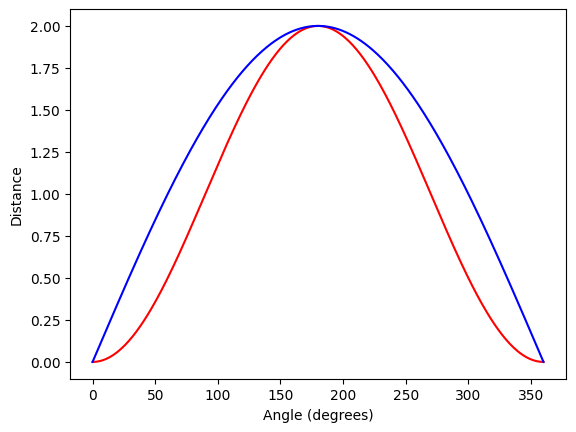

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Create an array of angles from 0 to 360 degrees
angles = np.linspace(0, 2*np.pi, 360)

# Calculate the Euclidean distance
cosine_d = 1 - np.cos(angles)
euclid_d = np.sqrt(2 - 2 * np.cos(angles))

# Plot the angles (converted to degrees) against the distances
plt.plot(np.degrees(angles), cosine_d, c='r')
plt.plot(np.degrees(angles), euclid_d, c='b')

# Set the labels for the x and y axes
plt.xlabel('Angle (degrees)')
plt.ylabel('Distance')

# Display the plot
plt.show()

#### Comparing Embedding Spaces
<u>Qualitative Methods</u>

Qualitatively, embedding spaces can be compared by plotting the embedding space in 2D after using various dimensionality reduction techniques.
- **PCA**: has the advantage of being deterministic but can only preserve linear relationships, as its algorithm iteratively projects data onto linear hyperplanes, selected to maximize the resulting spread (variance) of the data, until the desired dimensionality is reached.
- **t-SNE**: is non-deterministic, so separate runs can lead to different outcomes if using the result for decision making, but is able to preserve non-linear, local (short distance) patterns. However, it does not preserve global patterns / large structures.

Often, PCA and a non-linear algorithm are used in concert. PCA reduces the dimensionality to a level that non-linear algorithms can manage, and the non-linear algorithm reduces the dimensionality to 2D. The dimensionality level to switch from PCA to non-linear method can be chosen as the smallest level where PCA has not lost much of the variance in the data (e.g., 95%). Using PCA below this level runs the risk of losing meaningful non-linear relationships.

<br>

<u>Quantitative Methods</u>

Quantitatively, statistics of a **local neighborhood similarity** (LNS) metric can be calculated. Local neighborhoods are formed by a clustering algorithm, and can be compared via the **Intersection over Union** (IoU). IoU comes from the field of object detection, where it divides the intersection of two spaces by their union. These two spaces can be the predicted region of an object from two object detection algorithms, or it can be the prediction vs ground truth

In the case of word embeddings, the embedding space is treated discretely, comparing the number of points in embedding space instead of, for example, the boundary made by the points. Thus, to compare two word embedding models, we can use a clustering algorithm to create, for each word, a neighborhood for each model, and calculate the IoU for each word as the number of words shared the neighborhoods, divided by the total number of words in the two neighborhoods.


### The Analyses


Below is the plan for exploring the embedding spaces of our models in the context of Spanish verbs.
- To Do:
    - Distribution of the length of the vectors. Are they situated along a hypersphere?
    - General dispersion: How spread out are the vectors: average cosine distance and euclidean distance of the kth nearest neighbor for k in (1,20)
    - Distance between verb without context and its cluster
    - Dispersion of each verb (with context) and distance to other verbs (with context)
    - Are semantically similar verbs close in space
    - Can we perform matrix math to add or subtract semantic meaning. Semantic Analogies: Check if the embeddings preserve semantic relationships (e.g., “king - man + woman = queen”).
    - Are re verbs close to their non-re counterparts?
- Maybies:
    - Quantitative distribution comparison: local neighborhood similarity.
    - Quantitative distribution comparison: Align the distributions and for each pair of models, calculate the distribution of distances between the same word.
    - Do ar, er, ir verbs cluster?

Can I add clustering to this somehow? maybe chose 3 concepts and see how they are plotted around the unit circle for each model.

In [12]:
import eda_plot

#### Length of the Embedding Vectors


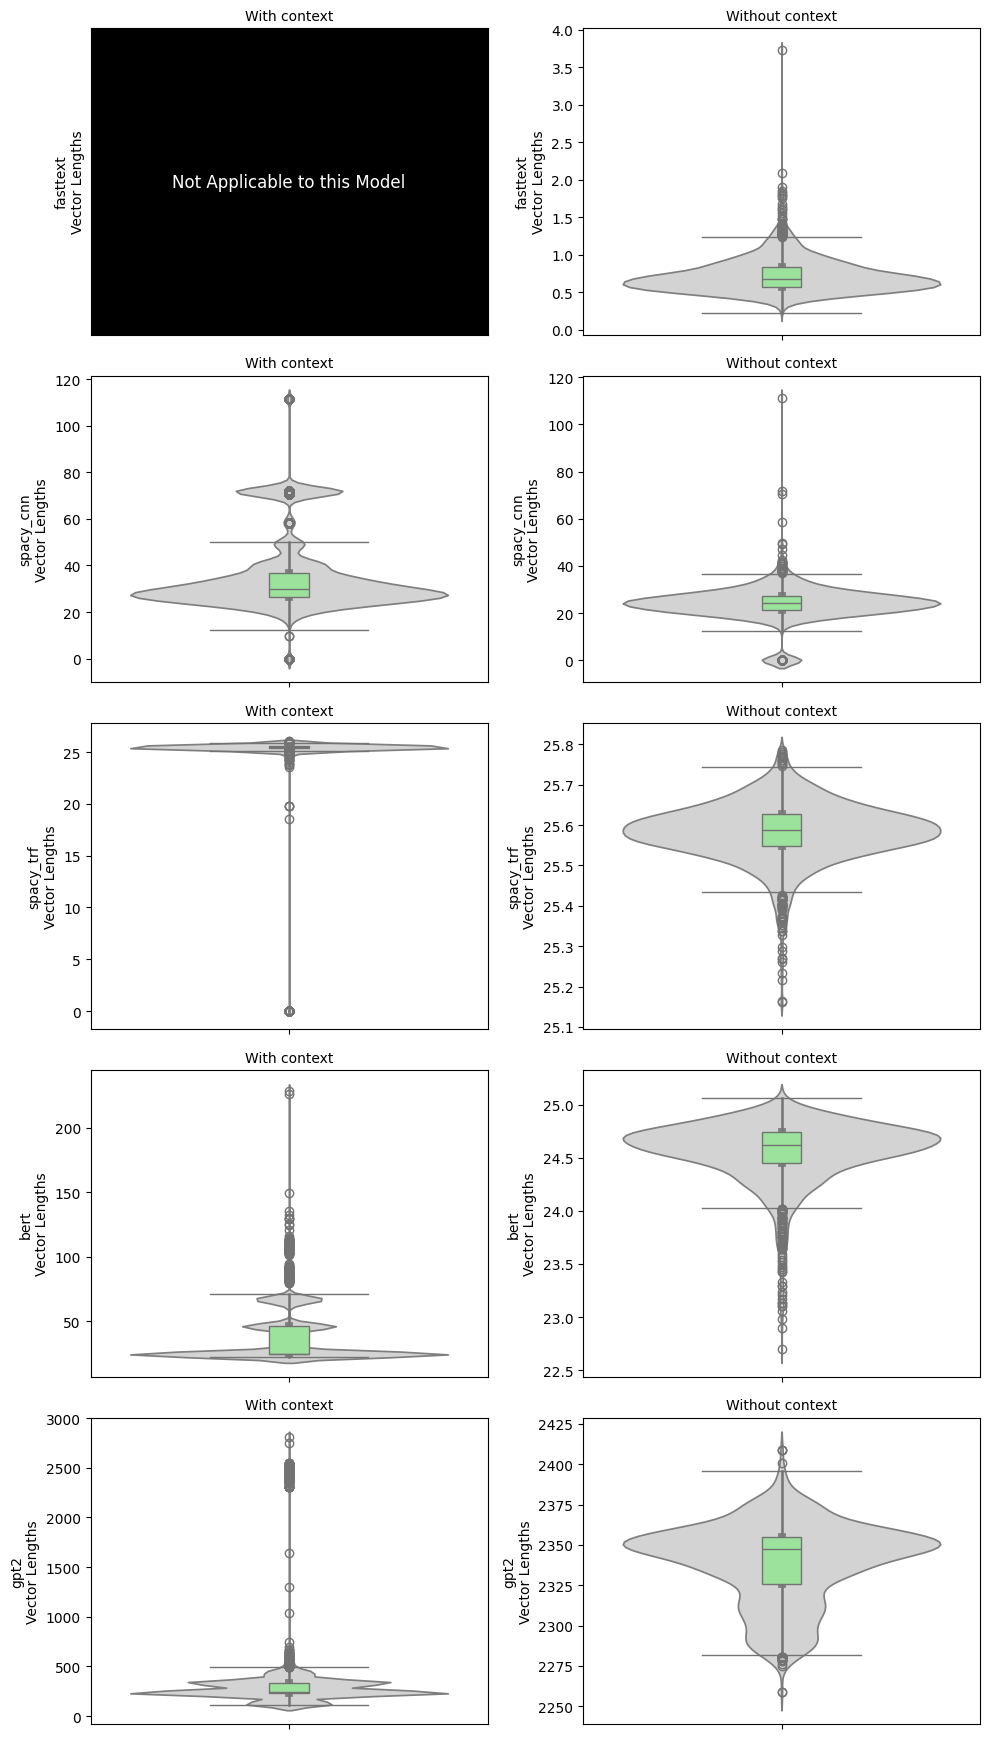

In [12]:
eda_plot.plot_vector_lengths(lengths_context, lengths_contextless)

In [13]:
lengths_summary = [
    pd.Series(lengths, name=f"context_{model_name}").describe()
    for model_name, lengths in lengths_context.items()
]
lengths_summary.extend([
    pd.Series(lengths, name=f"contextless_{model_name}").describe()
    for model_name, lengths in lengths_contextless.items()
])
lengths_summary = pd.concat(lengths_summary, axis=1).T
lengths_summary

,count,mean,std,min,25%,50%,75%,max
context_spacy_cnn,24342.0,35.302498,15.482053,0.000000,26.279287,29.675510,36.727104,111.420532
context_spacy_trf,24342.0,25.367493,1.622053,0.000000,25.380744,25.481926,25.572731,26.030066
context_bert,24337.0,36.836121,18.366222,22.413132,24.145987,24.445980,46.140308,228.707336
context_gpt2,24331.0,290.206451,203.872086,113.372017,228.260094,244.402237,335.716507,2809.753906
contextless_fasttext,1696.0,0.724102,0.234949,0.226445,0.566671,0.677202,0.835034,3.729053
contextless_spacy_cnn,1696.0,23.973904,7.442255,0.000000,21.183800,24.284879,27.422228,111.420532
contextless_spacy_trf,1696.0,25.583754,0.072664,25.161264,25.547695,25.586992,25.626463,25.785269
contextless_bert,1696.0,24.564001,0.288964,22.698347,24.456177,24.621042,24.743899,25.062794
contextless_gpt2,1696.0,2339.386719,25.022160,2258.827637,2325.619568,2347.461914,2355.146484,2408.863525


Comment on the distribution of the lengths. Are they centered around the unit hypersphere or any hypersphere.

#### Visualizing the Embedding Space: 2D Plot via Dimensionality Reduction


In [15]:
import importlib
importlib.reload(eda_plot)
importlib.reload(eda_util)

embeddings_context_2d = eda_util.reduce_embeddings_per_model(
    eda_util.agg_embeddings_per_model(embeddings_context, {}))
embeddings_contextless_2d = eda_util.reduce_embeddings_per_model(
    eda_util.agg_embeddings_per_model({}, embeddings_contextless))

clusters_context = None
clusters_contextless = None

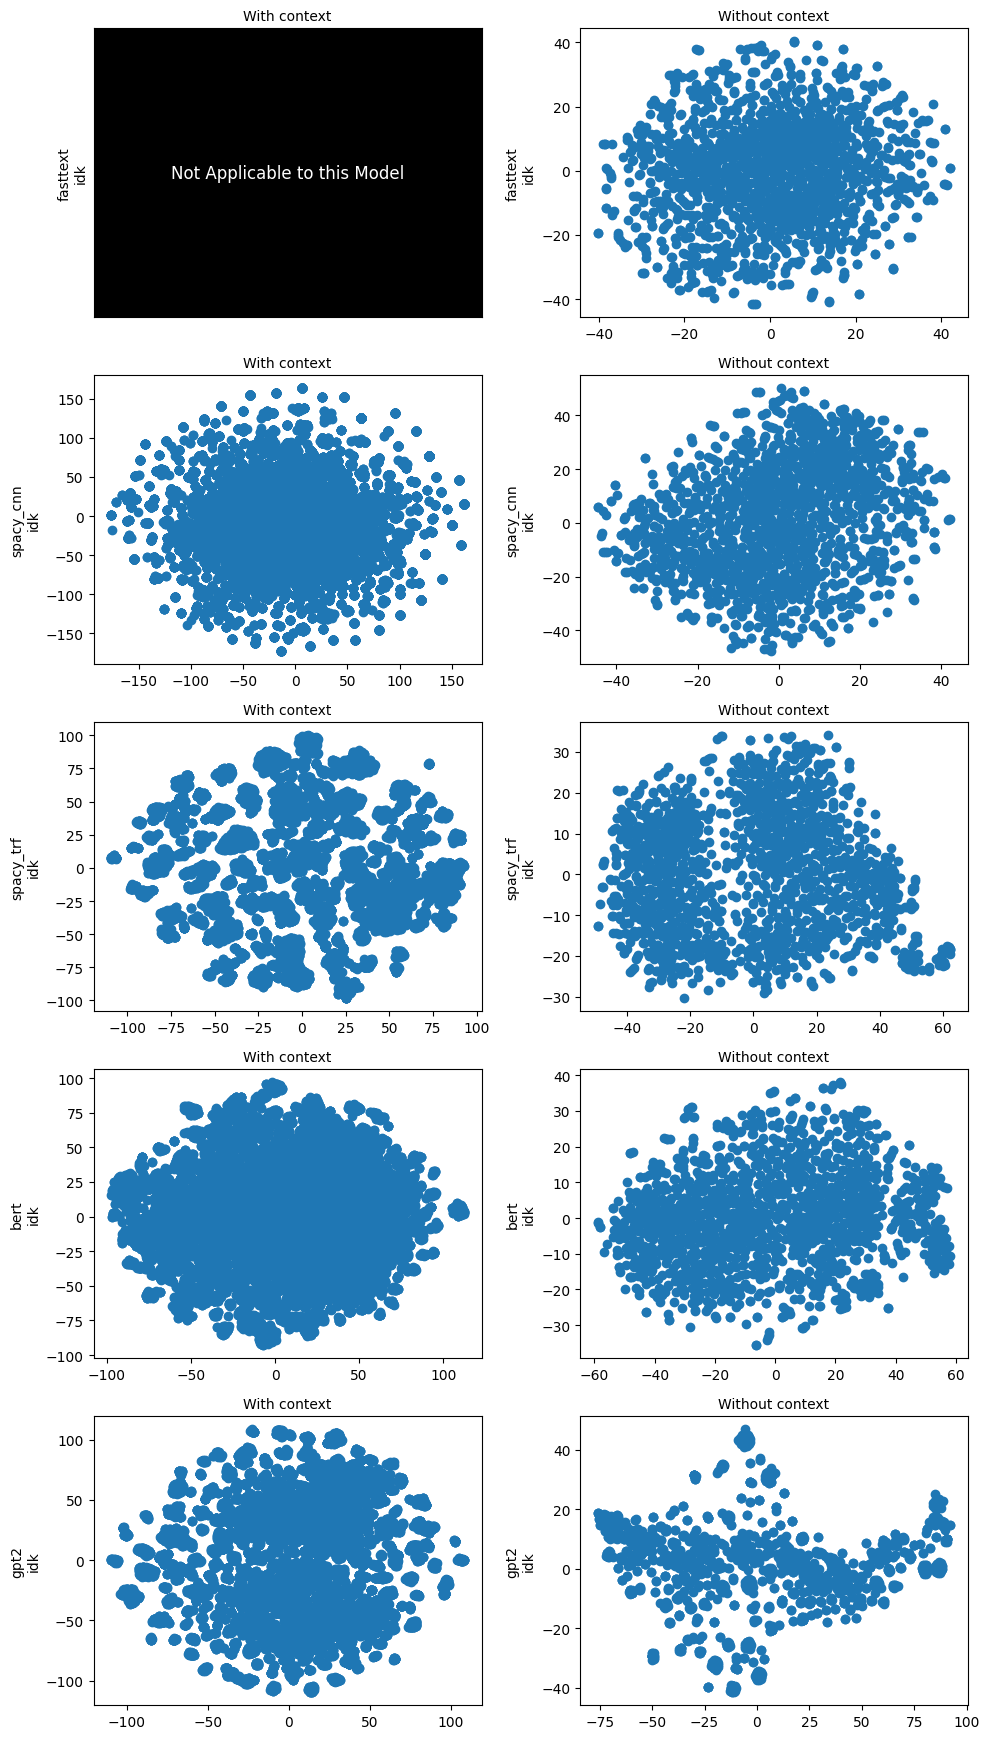

In [31]:
import importlib
import eda_plot
importlib.reload(eda_util)
importlib.reload(eda_plot)
clusters_context = None
clusters_contextless = None
eda_plot.plot_embedding_space(
    embeddings_context_2d,
    embeddings_contextless_2d,
    clusters_context,
    clusters_contextless)

In [49]:
model_name = 'spacy_trf'
model_embeddings = eda_util.agg_embeddings_per_model(embeddings_context, {})[model_name]

# model_embeddings = random.sample(model_embeddings, int(len(model_embeddings)/10))
from sklearn.mixture import BayesianGaussianMixture
cluster_model = BayesianGaussianMixture(
    n_components=10, # should be larger than max expected number
    weight_concentration_prior_type='dirichlet_process',
    random_state=42)
cluster_model.fit(model_embeddings)

BayesianGaussianMixture(n_components=10, random_state=42)

In [50]:
cluster_model.weights_

array([0.11053725, 0.07809487, 0.07645146, 0.13078754, 0.14878132,
       0.04941903, 0.0806318 , 0.15386933, 0.13588373, 0.03554368])

In [51]:
wtf = cluster_model.predict(model_embeddings)

In [52]:
from sklearn.metrics import pairwise_distances

# Assume vectors is your list of 10 vectors
distances = pairwise_distances(cluster_model.means_, metric='euclidean')
pd.DataFrame(distances)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,24.204823,17.409217,23.252760,14.257613,23.238672,22.837395,20.770792,18.163846,24.889796
1,24.204823,0.000000,24.466416,23.022932,24.505854,28.962226,16.988071,28.982928,16.610539,24.573958
2,17.409217,24.466416,0.000000,22.823630,17.691658,14.790791,22.346146,15.724922,17.693483,23.053567
3,23.252760,23.022932,22.823630,0.000000,20.825893,25.534950,19.584951,28.109733,15.225213,22.300718
4,14.257613,24.505854,17.691658,20.825893,0.000000,22.599785,23.669307,21.841626,18.458558,25.007673
5,23.238672,28.962226,14.790791,25.534950,22.599785,0.000000,26.031303,12.795924,22.087830,26.910286
6,22.837395,16.988071,22.346146,19.584951,23.669307,26.031303,0.000000,27.283323,16.865570,22.899219
7,20.770792,28.982928,15.724922,28.109733,21.841626,12.795924,27.283323,0.000000,23.129570,29.392004
8,18.163846,16.610539,17.693483,15.225213,18.458558,22.087830,16.865570,23.129570,0.000000,18.881180
9,24.889796,24.573958,23.053567,22.300718,25.007673,26.910286,22.899219,29.392004,18.881180,0.000000


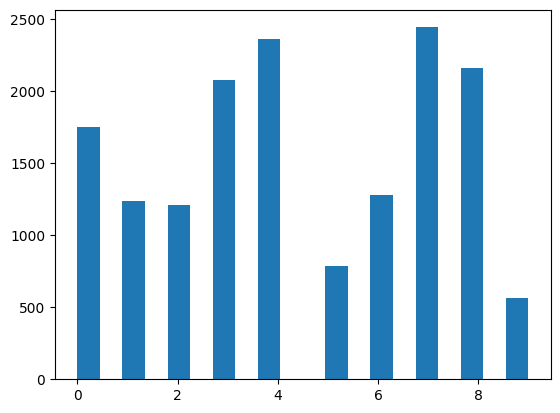

In [53]:
plt.hist(wtf, bins=20)
plt.show()


#### Visualizing the Embedding Space: Nearest Neighbors

One qualitative method to understand of the dispersion of a high dimensional embedding space is to measure the distances to the nearest neighbors of each embedding. To help us understand how embeddings are dispersed within the embedding space of each model, we will:
- Consider the Euclidean and Cosine distances of 10 nearest neighbors, with a step size of 5 neighbors to get a larger spread.
- Plot the distribution of distances from the embeddings to their nth nearest neighbor.
- State the median distance from the embeddings to their nth nearest neighbor.

<br>

<u>A Note on Nearest Neighbor Algorithms in High Dimensional Space</u>

Each model has XXXX embeddings with dimensionality of 300 or 768. Deterministic kNN methods will be far too computationally complex to compute, even with efficient algorithms like BallTree and KDTree.

There are multiple approximate kNN algorithms available (e.g., FAISS by Facebook, ScaNN by Google); we will use the [Annoy](https://github.com/spotify/annoy) algorithm which, like ScaNN, uses local sensitivity hashing.


In [14]:
def calc_and_save_neighbors(
    embeddings_context, embeddings_contextless, model_neighbors_loc):
    embeddings_per_model = eda_util.agg_embeddings_per_model(
        embeddings_context, embeddings_contextless)
    model_neighbors = eda_util.calc_neighbors_per_model(embeddings_per_model)
    eda_util.pickle_save(model_neighbors, model_neighbors_loc)

# Takes a while to estimate the NNs for each embedding in each model
model_neighbors_loc = 'data/neighbors.pkl'
# calc_and_save_neighbors(
#     embeddings_context, embeddings_contextless, model_neighbors_loc)
model_neighbors = eda_util.pickle_load(model_neighbors_loc)

In [35]:
df = eda_util.calc_nn_distance_stats(model_neighbors)
df[['Mean', 'Median', 'Std']] = df[['Mean', 'Median', 'Std']].round(2)
df.set_index(['Model', 'Distance Metric'])

Mean  Median    Std
Model     Distance Metric                      
spacy_cnn euclidean         5.96    0.00   8.96
          cosine            0.09    0.00   0.14
spacy_trf euclidean        14.13   13.59   4.43
          cosine            0.16    0.14   0.10
bert      euclidean        22.79   16.53  12.59
          cosine            0.20    0.21   0.06
gpt2      euclidean        72.39   64.29  42.70
          cosine            0.04    0.03   0.03
fasttext  euclidean         0.68    0.63   0.21
          cosine            0.54    0.54   0.11

In [33]:
df = eda_util.calc_nn_distance_stats(model_neighbors)
df[['Mean', 'Median', 'Std']] = df[['Mean', 'Median', 'Std']].round(2)
df.set_index(['Model', 'Distance Metric'])

Mean  Median    Std
Model     Distance Metric                      
spacy_cnn euclidean         8.33    0.00   9.62
          cosine            0.13    0.00   0.16
spacy_trf euclidean        14.73   14.02   4.56
          cosine            0.18    0.15   0.12
bert      euclidean        25.56   18.34  13.48
          cosine            0.21    0.22   0.07
gpt2      euclidean        83.39   79.92  43.06
          cosine            0.05    0.04   0.04
fasttext  euclidean         0.68    0.63   0.21
          cosine            0.54    0.54   0.10

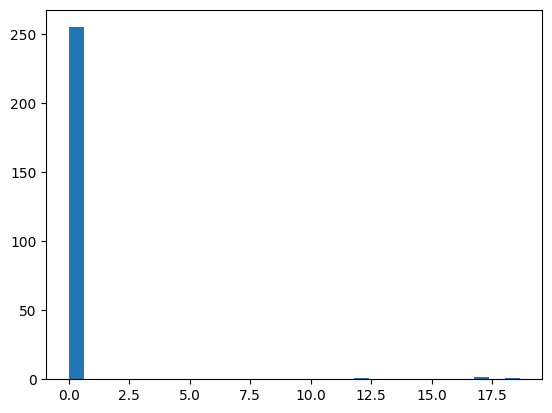

In [29]:
import random
len_ = len(model_neighbors['spacy_cnn']['euclidean'])
data = [x[0] for x in model_neighbors['spacy_cnn']['euclidean']]
data = random.sample(data, k=int(len_/50))
data = sorted(data)
data = data[int(len(data)/2):]
plt.hist(data, bins=30)
plt.show()


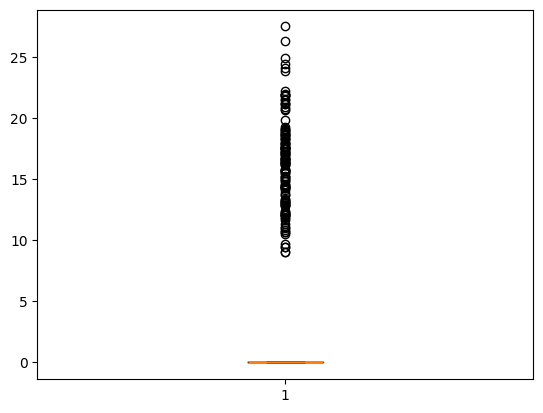

In [30]:
data = [x[0] for x in model_neighbors['spacy_cnn']['euclidean']]
plt.boxplot(data)
plt.show()

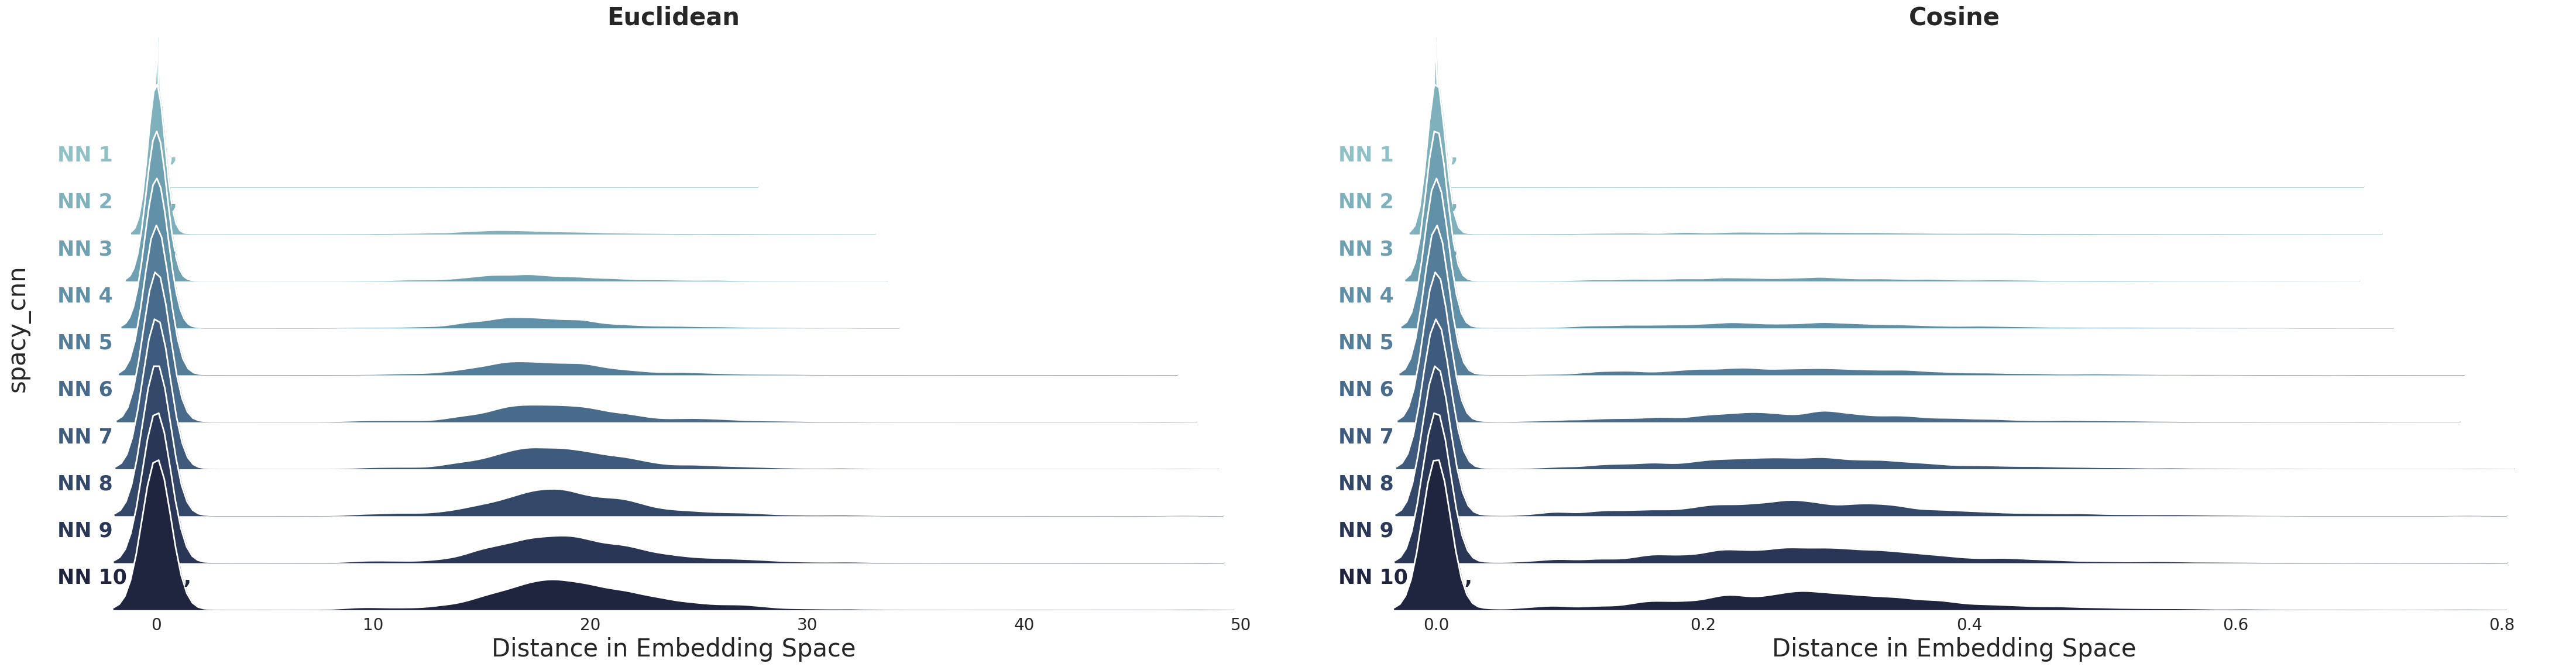

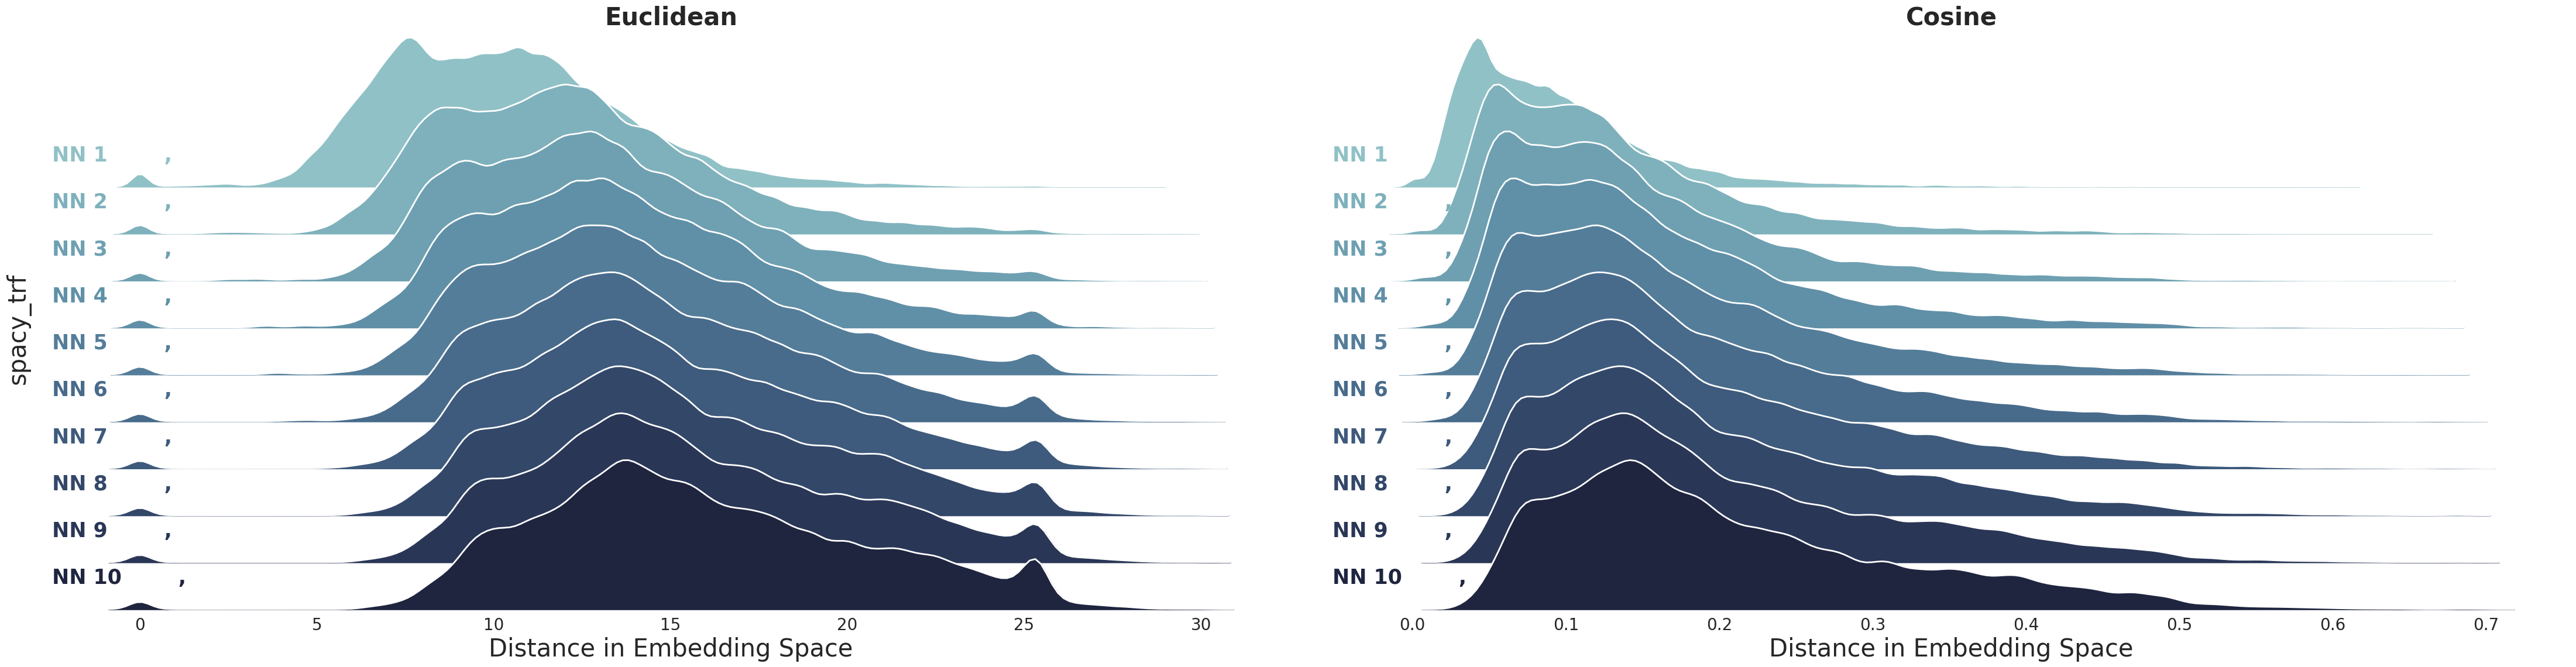

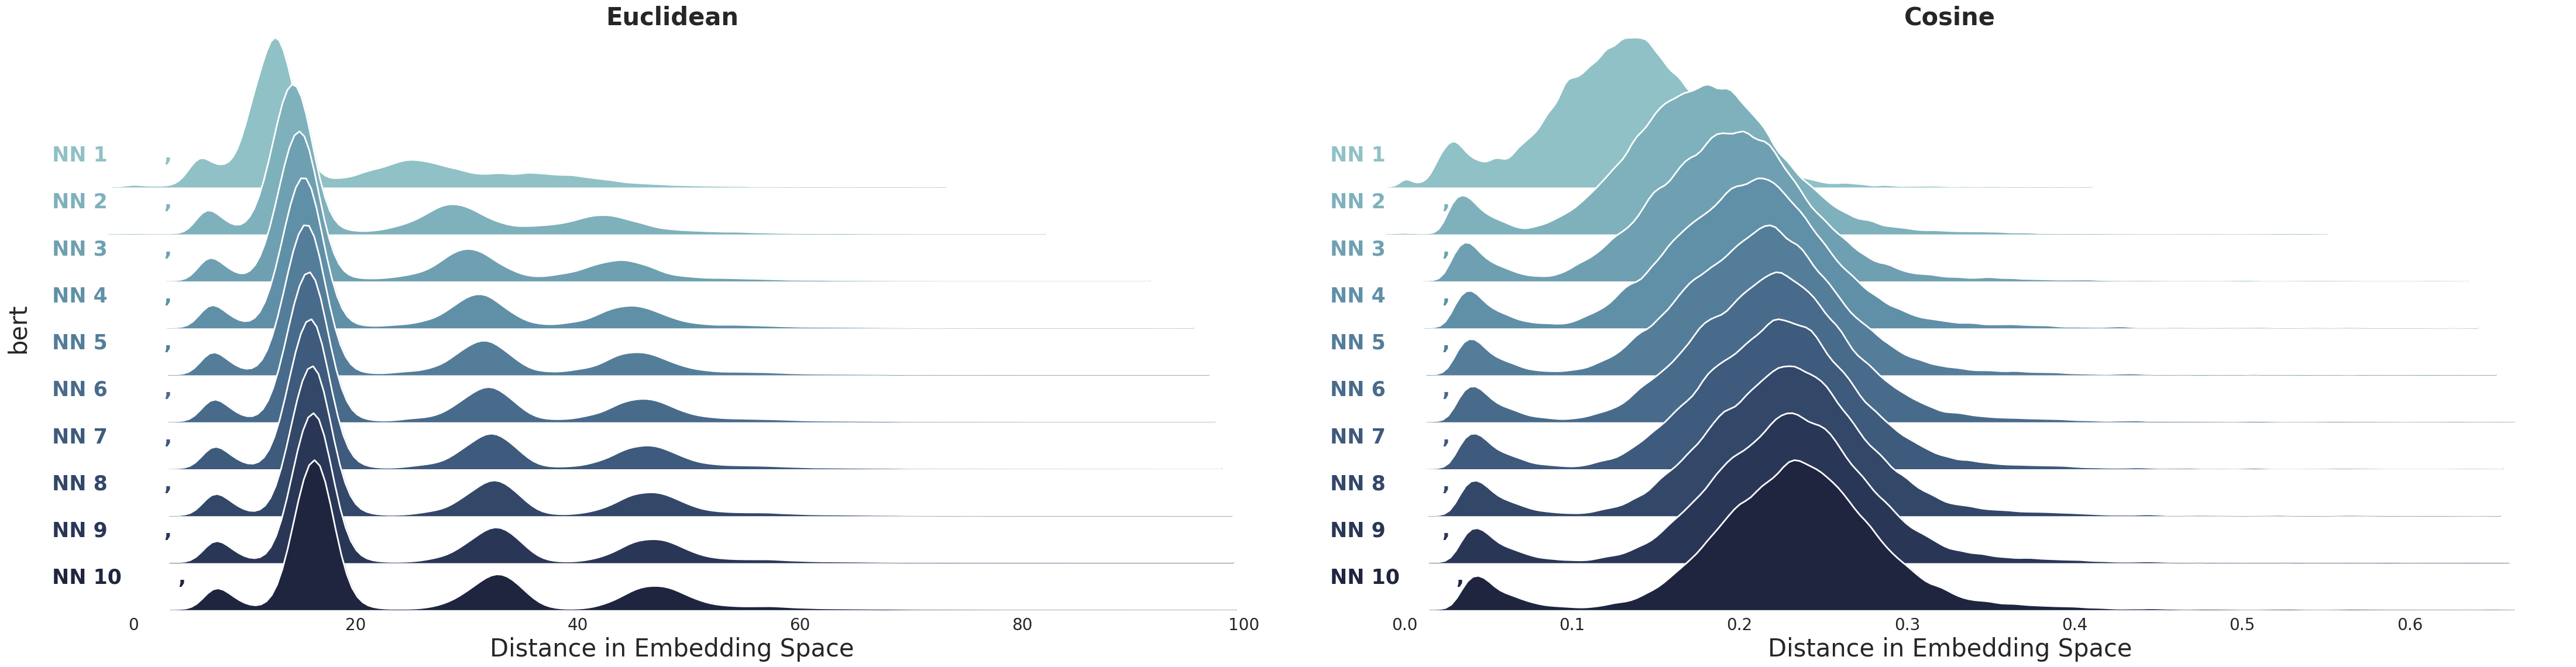

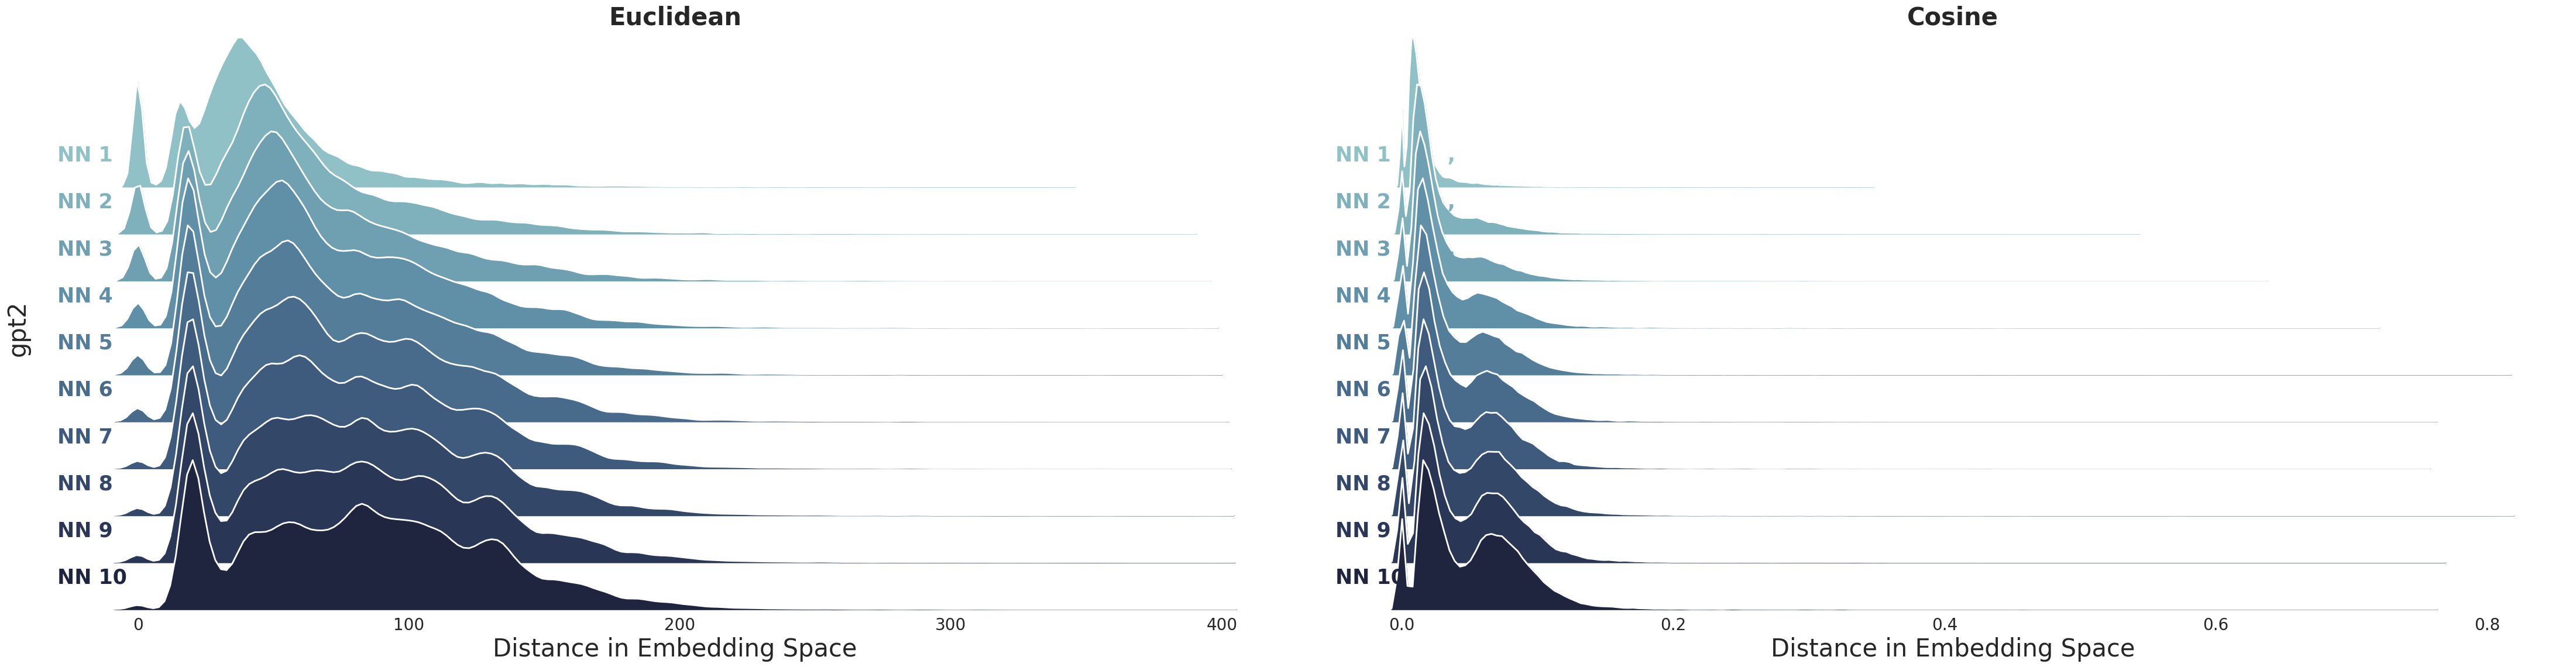

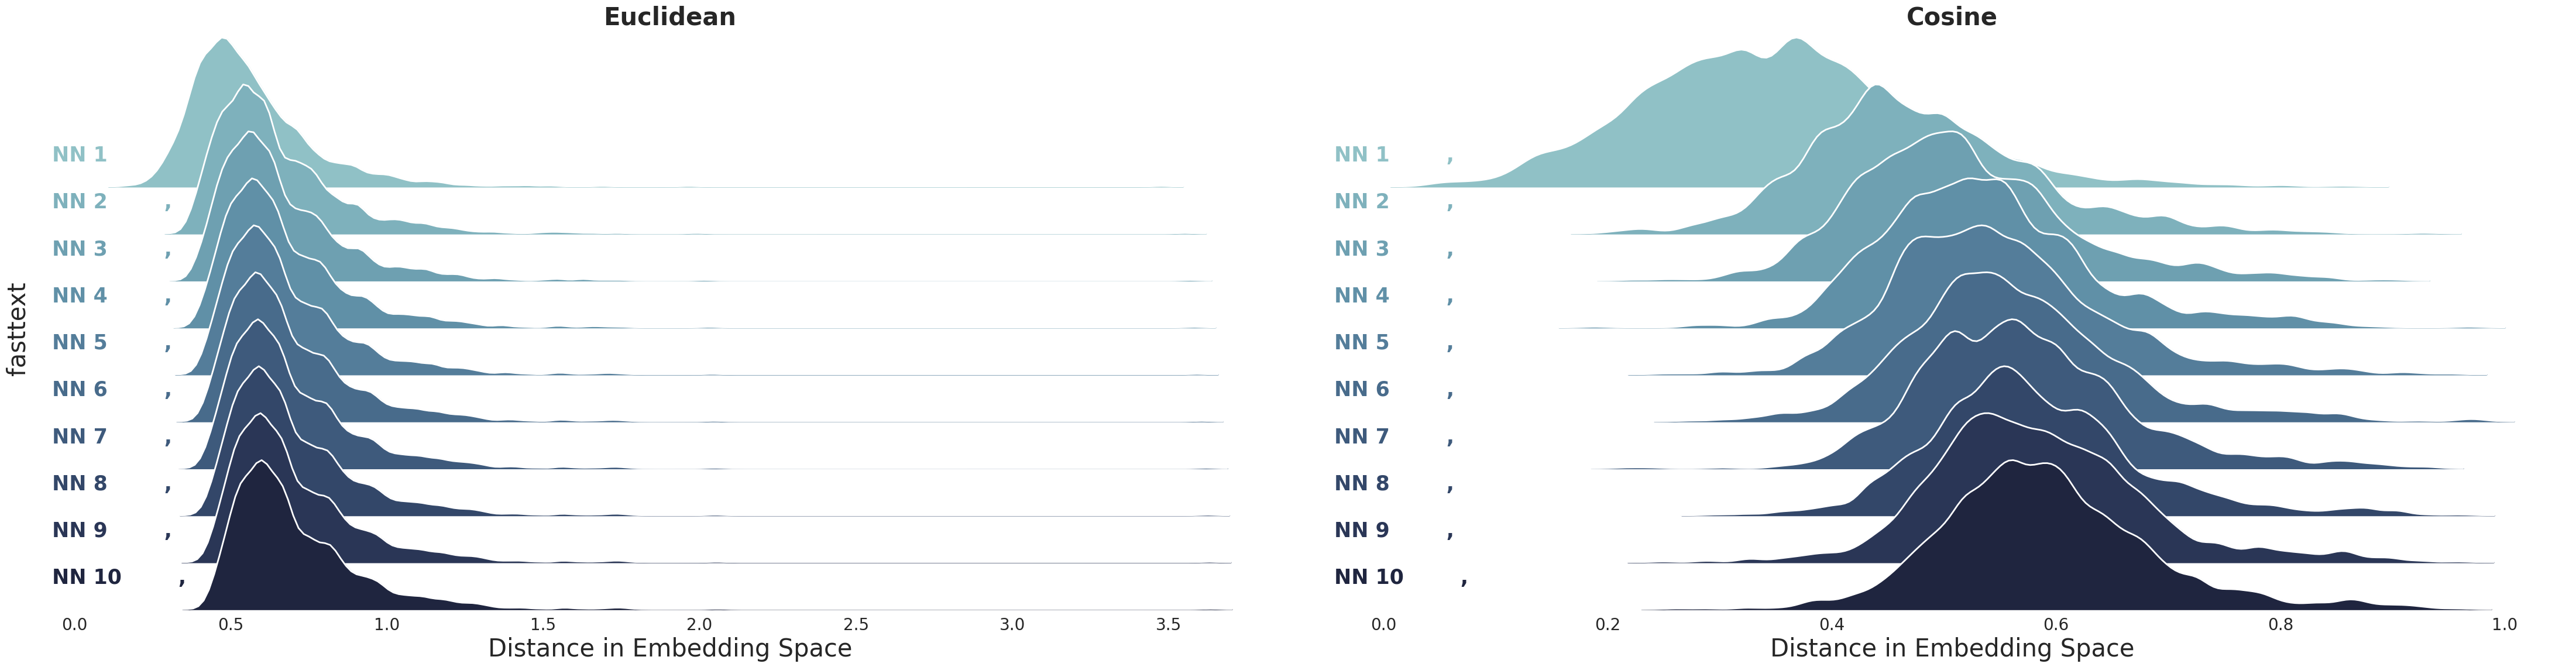

In [30]:
eda_plot.plot_nn_distance_distribution(
    model_neighbors, num_neighbors=10, plot_type='kde')

Each each is for one word embeddings model and distance metric, and shows for n nearest neighbors, the distribution of distances of all embeddings for that model, including the without context infinitives and with context verbs in sentences, for all verbs.

**COMMENT ON** the distributions.

### Baseline Distance in Embedding Space
So far, we've gotten a qualitative understanding of how the verbs and their uses are distributed in word embedding space by:
1. Using feature reduction to visualize the embedding space in 2D
2. Plotting the distribution of distances of each embedding with its 50 nearest neighbours (with steps of 5 neighbours).

Now we'd like to compare similar words and meanings to this baseline, so we'll calculate a quantitative baseline to understand similar word distances in comparison to the distance between any two embeddings.

In [16]:
distance_scales = eda_util.calc_distance_summary_metric(
    embeddings_context, metric='mean')

#### Dispersion of Conjugations from each other

Now that we have baselines for how close we can expect neighbors to be to each embedding, we can understand the dispersion of a verb in different contexts, in the context of that baseline.

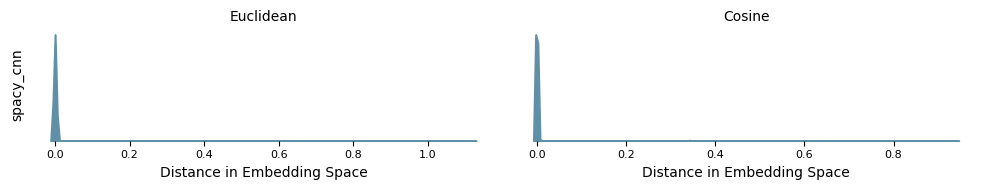

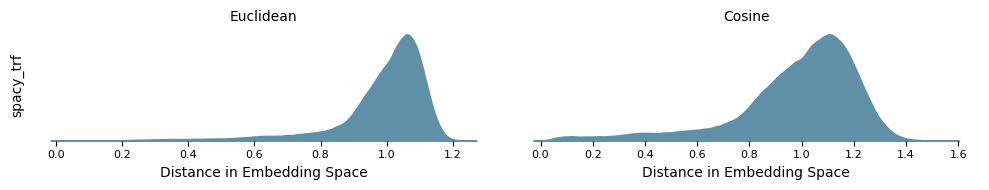

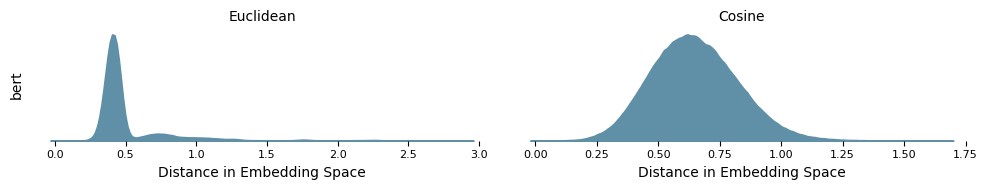

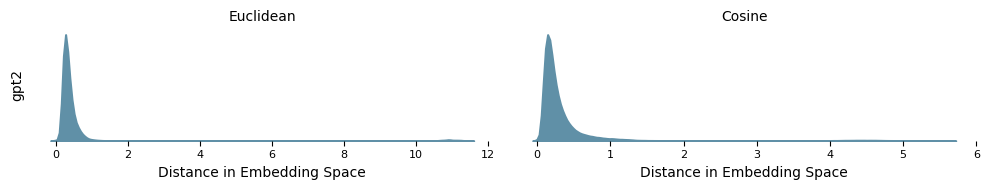

In [21]:
context_to_context_distances = eda_util.calc_distances_context_to_context(
    embeddings_context)

context_to_context_distances = eda_util.scale_distances(
    context_to_context_distances, distance_scales)

eda_plot.plot_distance_distribution(
    context_to_context_distances, plot_type='kde')

#### Dispersion of Infinitive from its Conjugations

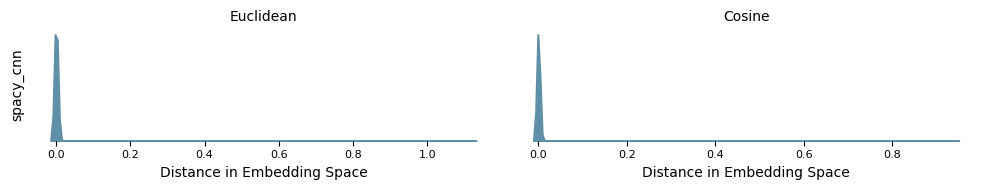

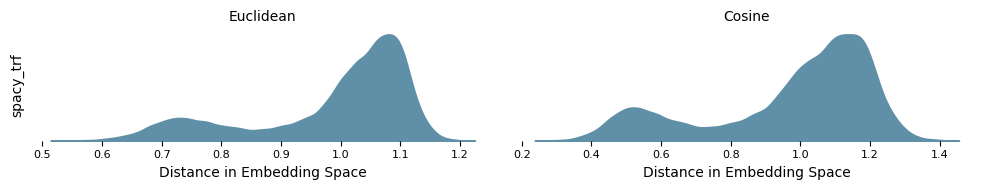

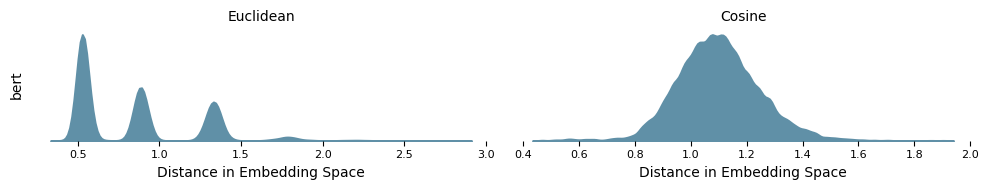

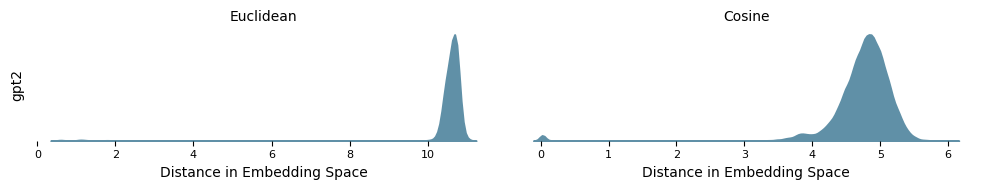

In [22]:
context_to_inf_distances = eda_util.get_distances_context_to_inf(
    embeddings_context, embeddings_contextless)

context_to_inf_distances = eda_util.scale_distances(
    context_to_inf_distances, distance_scales)

eda_plot.plot_distance_distribution(context_to_inf_distances, plot_type='kde')

#### Verbs and their Re Counterparts

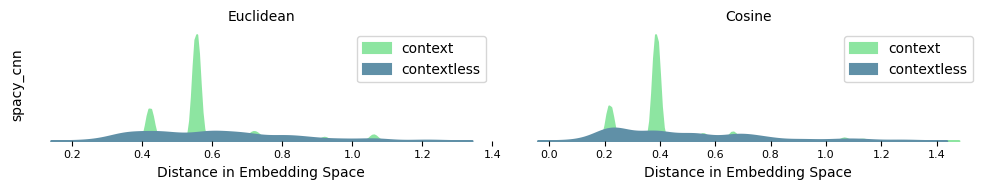

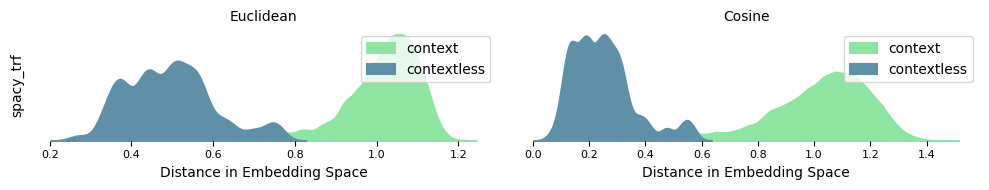

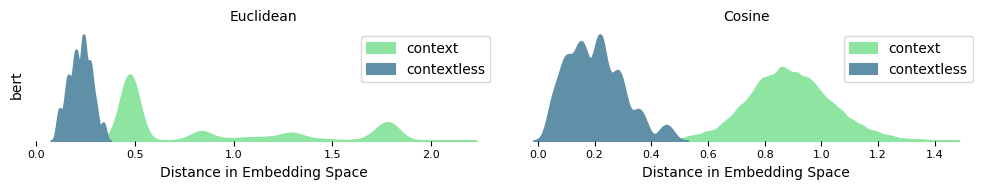

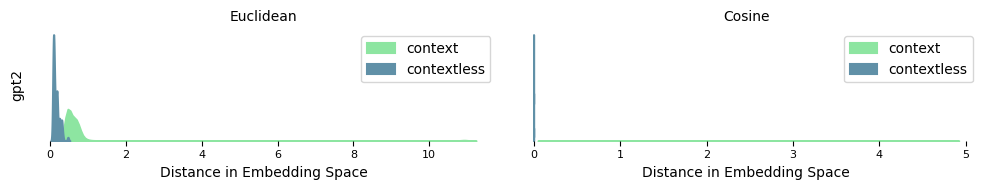

In [23]:
re_distances_context, re_distances_contextless \
    = eda_util.get_distances_re_verbs(
        embeddings_context, embeddings_contextless)

re_distances_context = eda_util.scale_distances(
    re_distances_context, distance_scales)
re_distances_contextless = eda_util.scale_distances(
    re_distances_contextless, distance_scales)

eda_plot.plot_re_distance_distribution(
    re_distances_context, re_distances_contextless, plot_type='kde')